   # Predicting the Number of Traffic Accident Injuries in Chicago

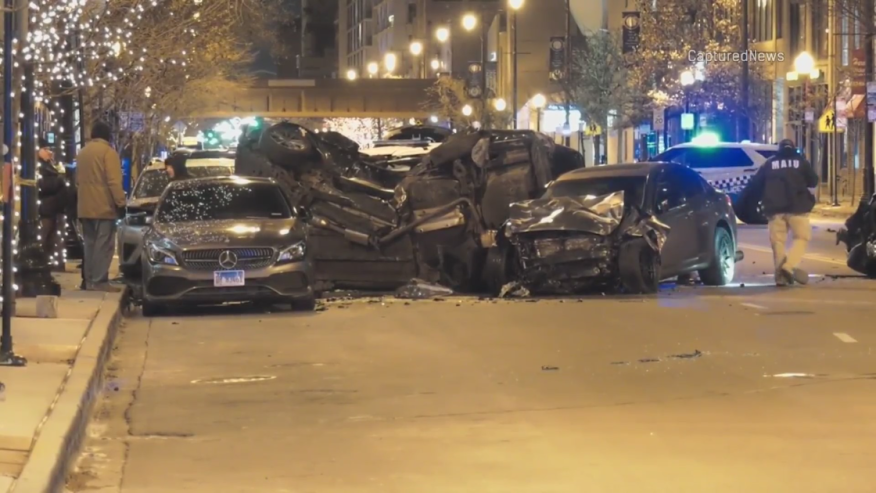

https://wgntv.com/news/chicago-news/
Man killed, 6 hurt in Near South Side car crash
by: Neshmia Malik
Posted: Nov 21, 2022 / 07:29 AM CST
Updated: Nov 21, 2022 / 10:16 AM CST

## Project Overview

Chicago is a busy city packed with traffic. All of this traffic dramatically raises the risk of a major car accident on any given roadway. 
On November 19, 2019, an unlicensed and uninsured driver failed to slow down at the intersection of 69th Street and Stony Island Avenue in Chicago, hitting and killing a bicyclist.
On January 23, 2020, four people were killed in a crash involving a school bus, taxi, and a pickup truck at the intersection of Stony Island Avenue, 79th Street and South Chicago Avenue. The pickup driver ran a red light, first hit the taxi driver and then the bus driver, who was at the intersection.
From 2019 to 2020, Chicago’s traffic fatalities increased by 16 percent – making 2020 the deadliest year for Illinois drivers in 13 years.
The high volume of traffic accidents, injuries, and deaths might lead one to question: what are the main causes of car accidents in Chicago?

## Business Understanding

The goal of this project is to produce a predictive model that would facilitate the analysis of the primary causes for car crashes in Chicago City. Using data provided by the City of Chicago, the aim is to use the information provided from the Chicago Data Portal and identify patterns and trends that can be implemented with satisfactory results. The goal is to reduce the instances of crashes with preventive measures informed by the predictive model.

## Objectives

### Main Objective
* To produce a predictive model that would facilitate the analysis of the primary causes for car crashes in Chicago City.

### Sub Objectives

* Analyze control failures to identify opportunities for improvement
* Check for trends in the time of crash to relocate resources appropriately
* Check for accidents caused by poor road quality and conditions and how to improve on it.
* Check for accidents caused by natural forces.

## Data Understanding

The Traffic Crashes data comes from the Chicago Data Portal, an open data source maintained by the city of Chicago. The dataset contains all traffic crashes that were reported by the police within the city limits, going back to 2017. Linked to the crash dataset are two datasets corresponding to Vehicles and Persons involved in the crash. Each crash incident has a unique crash record ID and report number associated with it, which allows for cross-referencing on the dashboards provided for the datasets. A link to the main dataset can be found here: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

## Data Preparation

In exploring the data, the majority of focus is to look at the causative factors involved in accidents which lead to major injury and in specific fatalities. Given the severe resulting nature of these accidents, it is believed to be the most pertinent and the most impactful features to explore to hopefully help the City of Chicago reduce the amount of these types of incidents. We were able to obtain ample information regarding the specific primary causes of these accidents based on conditions which we shall explore more on the project.

## Import Libraries

Lets start the project by importing the necessary libraries needed for these data.

In [3]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, classification_report, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_Pipeline
import warnings 
warnings.filterwarnings("ignore")

## Loading the data

Lets use the .read_csv() format to read our datadets.

In [4]:
# read the crashes data
crashes_df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")

In [5]:
# read the people data
people_df = pd.read_csv("Traffic_Crashes_-_People.csv", low_memory=False)

In [6]:
# read the vehicles data
vehicles_df = pd.read_csv("Traffic_Crashes_-_Vehicles.csv", low_memory=False)

Lets fetch the dimensions of Pandas and NumPy type objects of the above datasets.

In [7]:
# have a look at the crashes shape dataset
crashes_df.shape

(454018, 49)

In [8]:
# have a look at the people shape dataset
people_df.shape

(428504, 30)

In [9]:
# have a look at the vehicles shape dataset
vehicles_df.shape

(1412851, 72)

## 1). Data Cleaning

Lets print each information of the above datasets and drop the un-necessary or duplicate columns.

In [10]:
# have a look at the crashes information
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454018 entries, 0 to 454017
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                454018 non-null  object 
 1   RD_NO                          454013 non-null  object 
 2   CRASH_DATE_EST_I               34616 non-null   object 
 3   CRASH_DATE                     454013 non-null  object 
 4   POSTED_SPEED_LIMIT             454013 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         454013 non-null  object 
 6   DEVICE_CONDITION               454013 non-null  object 
 7   WEATHER_CONDITION              454013 non-null  object 
 8   LIGHTING_CONDITION             454013 non-null  object 
 9   FIRST_CRASH_TYPE               454013 non-null  object 
 10  TRAFFICWAY_TYPE                454013 non-null  object 
 11  LANE_CNT                       137601 non-null  float64
 12  ALIGNMENT                     

In [11]:
# drop the un-necessary columns or duplicates in the crashes dataset
new_crashes_df = crashes_df.drop(columns=['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 

                        'LANE_CNT', 'ALIGNMENT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 

                        'HIT_AND_RUN_I', 'DATE_POLICE_NOTIFIED', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 

                        'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'LATITUDE', 'LONGITUDE', 

                        'LOCATION']) 

new_crashes_df

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,14.0,2.0,3.0
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30.0,NO CONTROLS,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,4.0,9.0
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,30.0,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,UNKNOWN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,7.0
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.0,2.0,8.0
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454013,b03c059af9456c6b5cbfe08cebfe66f64a386bf73a2038...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454014,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454015,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454016,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# have a look at the people information
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428504 entries, 0 to 428503
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              428504 non-null  object 
 1   PERSON_TYPE            428500 non-null  object 
 2   CRASH_RECORD_ID        428500 non-null  object 
 3   RD_NO                  428499 non-null  object 
 4   VEHICLE_ID             419897 non-null  float64
 5   CRASH_DATE             428499 non-null  object 
 6   SEAT_NO                95203 non-null   float64
 7   CITY                   299038 non-null  object 
 8   STATE                  305296 non-null  object 
 9   ZIPCODE                270428 non-null  object 
 10  SEX                    421488 non-null  object 
 11  AGE                    291508 non-null  float64
 12  DRIVERS_LICENSE_STATE  235322 non-null  object 
 13  DRIVERS_LICENSE_CLASS  191159 non-null  object 
 14  SAFETY_EQUIPMENT       427246 non-nu

In [13]:
# drop the un-necessary columns or duplicates in the people dataset
new_people_df = people_df.drop(columns=['PERSON_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE', 'SEAT_NO','STATE', 'ZIPCODE', 'DRIVERS_LICENSE_STATE', 

                         'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'EJECTION', 'HOSPITAL', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 

                         'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']) 

new_people_df

,PERSON_TYPE,CRASH_RECORD_ID,CITY,SEX,AGE,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,CHICAGO,M,25.0,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,CHICAGO,M,37.0,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED
2,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,NaN,X,NaN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN
3,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,NaN,X,NaN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
4,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,NaN,X,NaN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...
428499,PEDESTRIAN,f1de324dd1dc7959127570c8d6ef{,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# have a look at the vehicles information
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412851 entries, 0 to 1412850
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1412851 non-null  int64  
 1   CRASH_RECORD_ID           1412851 non-null  object 
 2   RD_NO                     1404420 non-null  object 
 3   CRASH_DATE                1412851 non-null  object 
 4   UNIT_NO                   1412851 non-null  int64  
 5   UNIT_TYPE                 1410892 non-null  object 
 6   NUM_PASSENGERS            209107 non-null   float64
 7   VEHICLE_ID                1380857 non-null  float64
 8   CMRC_VEH_I                26380 non-null    object 
 9   MAKE                      1380852 non-null  object 
 10  MODEL                     1380708 non-null  object 
 11  LIC_PLATE_STATE           1255344 non-null  object 
 12  VEHICLE_YEAR              1156546 non-null  float64
 13  VEHICLE_DEFECT            1

In [15]:
# drop the un-necessary columns or duplicates in the vehicle dataset
new_vehicles_df = vehicles_df.drop(columns=['CRASH_UNIT_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 

                          'CMRC_VEH_I', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'VEHICLE_USE',  

                          'MANEUVER', 'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 

                          'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 

                          'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 

                          'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME',  

                          'CARRIER_STATE', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I','HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 

                          'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO', 'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I', 

                          'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 

                          'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT', 'VEHICLE_CONFIG', 

                          'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I', 'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS'])  

new_vehicles_df

,CRASH_RECORD_ID,VEHICLE_DEFECT,TRAVEL_DIRECTION,EXCEED_SPEED_LIMIT_I
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,NONE,N,NaN
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,UNKNOWN,N,NaN
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,NONE,N,NaN
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,UNKNOWN,N,NaN
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,NONE,W,NaN
...,...,...,...,...
1412846,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,UNKNOWN,N,NaN
1412847,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,UNKNOWN,N,NaN
1412848,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,UNKNOWN,S,NaN
1412849,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,NONE,S,NaN


Now that we've dropped the un-necessary columns, lets check on the new dataset shapes and the missing / NaN values in each dataset. In that way we can tell if the samples of the population are small. if so, we can drop the missing/Nan values and if not, will know for sure if we shall fillna with 0. 

In [16]:
# checking on the new_crashes_df shape
new_crashes_df.shape

(454018, 24)

In [17]:
new_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454018 entries, 0 to 454017
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                454018 non-null  object 
 1   POSTED_SPEED_LIMIT             454013 non-null  float64
 2   DEVICE_CONDITION               454013 non-null  object 
 3   WEATHER_CONDITION              454013 non-null  object 
 4   LIGHTING_CONDITION             454013 non-null  object 
 5   ROADWAY_SURFACE_COND           454013 non-null  object 
 6   ROAD_DEFECT                    454013 non-null  object 
 7   DAMAGE                         454013 non-null  object 
 8   PRIM_CONTRIBUTORY_CAUSE        454013 non-null  object 
 9   SEC_CONTRIBUTORY_CAUSE         454013 non-null  object 
 10  STREET_NO                      454013 non-null  float64
 11  STREET_DIRECTION               454010 non-null  object 
 12  STREET_NAME                   

In [18]:
# checking for the missing / NaN values within the new_crashes_df
new_crashes_df.isnull().sum()

CRASH_RECORD_ID                    0
POSTED_SPEED_LIMIT                 5
DEVICE_CONDITION                   5
WEATHER_CONDITION                  5
LIGHTING_CONDITION                 5
ROADWAY_SURFACE_COND               5
ROAD_DEFECT                        5
DAMAGE                             5
PRIM_CONTRIBUTORY_CAUSE            5
SEC_CONTRIBUTORY_CAUSE             5
STREET_NO                          5
STREET_DIRECTION                   8
STREET_NAME                        5
MOST_SEVERE_INJURY               995
INJURIES_TOTAL                   986
INJURIES_FATAL                   986
INJURIES_INCAPACITATING          986
INJURIES_NON_INCAPACITATING      986
INJURIES_REPORTED_NOT_EVIDENT    986
INJURIES_NO_INDICATION           986
INJURIES_UNKNOWN                 986
CRASH_HOUR                         5
CRASH_DAY_OF_WEEK                  5
CRASH_MONTH                        5
dtype: int64

Compared to the total values of 454,018, the remaining null values represents a small sample in our entire population. We will drop them.

In [19]:
# drop the null values
new_crashes_df.dropna(axis=0, inplace=True)

In [20]:
# check if the null values were dropped
new_crashes_df.isnull().sum()

CRASH_RECORD_ID                  0
POSTED_SPEED_LIMIT               0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH                      0
dtype: int64

In [21]:
# check on the new shape of the new_crashes_df
new_crashes_df.shape

(453020, 24)

In [22]:
# have a view on the dataset after dropping the null values
new_crashes_df.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,14.0,2.0,3.0
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,30.0,NO CONTROLS,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",FAILING TO YIELD RIGHT-OF-WAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,4.0,9.0
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,30.0,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,UNKNOWN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,7.0
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.0,2.0,8.0
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18.0,6.0,7.0


In [23]:
new_crashes_df.tail()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
454008,afb70c8c4702f9475ce855067dec35ae70461a52a04f71...,30.0,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,7.0,10.0
454009,b220f36319e85ec298bdc0cd7be18a947a1492d357f12e...,30.0,NO CONTROLS,CLEAR,DAYLIGHT,DRY,UNKNOWN,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15.0,6.0,3.0
454010,b2005b31005acabf55bb73205096a3395a12c91cfffca3...,30.0,NO CONTROLS,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",IMPROPER BACKING,FOLLOWING TOO CLOSELY,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,5.0,10.0
454011,afaa9626528aad89fc84c1e6143cb2fcc7cfb1a22e2123...,30.0,NO CONTROLS,RAIN,DAYLIGHT,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,5.0,2.0
454012,b07e5e26a893c309d49d43a9ff87f6d68f936278346848...,25.0,NO CONTROLS,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,15.0,5.0,4.0


In [24]:
new_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453020 entries, 0 to 454012
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                453020 non-null  object 
 1   POSTED_SPEED_LIMIT             453020 non-null  float64
 2   DEVICE_CONDITION               453020 non-null  object 
 3   WEATHER_CONDITION              453020 non-null  object 
 4   LIGHTING_CONDITION             453020 non-null  object 
 5   ROADWAY_SURFACE_COND           453020 non-null  object 
 6   ROAD_DEFECT                    453020 non-null  object 
 7   DAMAGE                         453020 non-null  object 
 8   PRIM_CONTRIBUTORY_CAUSE        453020 non-null  object 
 9   SEC_CONTRIBUTORY_CAUSE         453020 non-null  object 
 10  STREET_NO                      453020 non-null  float64
 11  STREET_DIRECTION               453020 non-null  object 
 12  STREET_NAME                   

Lets check on the next dataset

In [25]:
# checking on the new_people_df shape
new_people_df.shape

(428504, 9)

In [26]:
new_people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428504 entries, 0 to 428503
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_TYPE            428500 non-null  object 
 1   CRASH_RECORD_ID        428500 non-null  object 
 2   CITY                   299038 non-null  object 
 3   SEX                    421488 non-null  object 
 4   AGE                    291508 non-null  float64
 5   AIRBAG_DEPLOYED        420682 non-null  object 
 6   INJURY_CLASSIFICATION  428362 non-null  object 
 7   DRIVER_ACTION          332480 non-null  object 
 8   DRIVER_VISION          332325 non-null  object 
dtypes: float64(1), object(8)
memory usage: 29.4+ MB


In [27]:
# checking for the missing / NaN values within the new_people_df
new_people_df.isnull().sum()

PERSON_TYPE                   4
CRASH_RECORD_ID               4
CITY                     129466
SEX                        7016
AGE                      136996
AIRBAG_DEPLOYED            7822
INJURY_CLASSIFICATION       142
DRIVER_ACTION             96024
DRIVER_VISION             96179
dtype: int64

Compared to the total values of 428,504, we have majority of values missing for "City", and "Age" columns. Because  of this, will just drop the columns. But as for the "Driver_Action", "Driver_Vision", "Person_type", "Crash_record_ID", "Airbag_deployed" and "Injury_Classification" columns, the missing values range between 0% to 23% which is not so bad since we have 3/4 of the data in those columns. For these, will just drop the missing values.

In [28]:
#Drop the "Age" and "City" column and look at the new data
new_people_df.drop(columns=['AGE','CITY'])
new_cleaned_people_df = new_people_df.drop(columns=['AGE','CITY'])
new_cleaned_people_df 

,PERSON_TYPE,CRASH_RECORD_ID,SEX,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED
2,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,X,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN
3,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,X,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
4,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,X,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...
428499,PEDESTRIAN,f1de324dd1dc7959127570c8d6ef{,NaN,NaN,NaN,NaN,NaN
428500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428502,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# drop the missing null values
new_cleaned_people_df.dropna(axis=0, inplace=True)

In [30]:
# check if the values have been dropped
new_cleaned_people_df

,PERSON_TYPE,CRASH_RECORD_ID,SEX,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
1,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED
2,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,X,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN
3,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,X,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
4,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,X,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...
428494,DRIVER,0edb34e73fb75c118dc9f171f2b16894bb137aeb7b74c7...,F,DID NOT DEPLOY,NO INDICATION OF INJURY,IMPROPER TURN,NOT OBSCURED
428495,DRIVER,eac95fca84308ba37367651521afc50be713667a809037...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,OTHER,NOT OBSCURED
428496,DRIVER,eac95fca84308ba37367651521afc50be713667a809037...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED
428497,DRIVER,66938e0a669dfdc2fc2d24345a7a3342982a1bf1711a0d...,M,NOT APPLICABLE,NO INDICATION OF INJURY,NONE,NOT OBSCURED


In [31]:
# check on the new shape of the new_cleaned_people_df
new_cleaned_people_df.shape

(325468, 7)

In [32]:
# check information on the new_cleaned_people_df
new_cleaned_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325468 entries, 0 to 428498
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   PERSON_TYPE            325468 non-null  object
 1   CRASH_RECORD_ID        325468 non-null  object
 2   SEX                    325468 non-null  object
 3   AIRBAG_DEPLOYED        325468 non-null  object
 4   INJURY_CLASSIFICATION  325468 non-null  object
 5   DRIVER_ACTION          325468 non-null  object
 6   DRIVER_VISION          325468 non-null  object
dtypes: object(7)
memory usage: 19.9+ MB


Lets check on the next dataset

In [33]:
# checking on the new_vehicles_df shape
new_vehicles_df.shape

(1412851, 4)

In [34]:
# check information on the new_vehicles_df
new_vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412851 entries, 0 to 1412850
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   CRASH_RECORD_ID       1412851 non-null  object
 1   VEHICLE_DEFECT        1380857 non-null  object
 2   TRAVEL_DIRECTION      1380857 non-null  object
 3   EXCEED_SPEED_LIMIT_I  2397 non-null     object
dtypes: object(4)
memory usage: 43.1+ MB


In [35]:
# checking for the missing / NaN values within the new_vehicles_df
new_vehicles_df.isnull().sum()

CRASH_RECORD_ID               0
VEHICLE_DEFECT            31994
TRAVEL_DIRECTION          31994
EXCEED_SPEED_LIMIT_I    1410454
dtype: int64

Compared to the total values of 1,412,851, we have majority of values missing for the "Exceed_speed_limit" column. Because of this, will just drop the column since 99% of the data is missing. But as for the "Vehicle_defect" and "Travel_direction", the missing values range between 0.02% which is a very small percentage since we have more than 3/4 of the data in those columns. For these, will just drop the missing values.

In [36]:
# drop the "Exceed_speed_limit" column
new_vehicles_df.drop(columns=['EXCEED_SPEED_LIMIT_I'])
new_cleaned_vehicles_df = new_vehicles_df.drop(columns=['EXCEED_SPEED_LIMIT_I'])
new_cleaned_vehicles_df

,CRASH_RECORD_ID,VEHICLE_DEFECT,TRAVEL_DIRECTION
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,NONE,N
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,UNKNOWN,N
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,NONE,N
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,UNKNOWN,N
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,NONE,W
...,...,...,...
1412846,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,UNKNOWN,N
1412847,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,UNKNOWN,N
1412848,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,UNKNOWN,S
1412849,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,NONE,S


In [37]:
# drop the missing null values
new_cleaned_vehicles_df.dropna(axis=0, inplace=True)

In [38]:
# check if the values have been dropped
new_cleaned_vehicles_df

,CRASH_RECORD_ID,VEHICLE_DEFECT,TRAVEL_DIRECTION
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,NONE,N
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,UNKNOWN,N
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,NONE,N
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,UNKNOWN,N
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,NONE,W
...,...,...,...
1412846,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,UNKNOWN,N
1412847,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,UNKNOWN,N
1412848,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,UNKNOWN,S
1412849,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,NONE,S


In [39]:
# check on the new shape of the new_cleaned_vehicles_df
new_cleaned_vehicles_df.shape

(1380857, 3)

In [40]:
# check information on the new_cleaned_vehicles_df
new_cleaned_vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380857 entries, 0 to 1412850
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   CRASH_RECORD_ID   1380857 non-null  object
 1   VEHICLE_DEFECT    1380857 non-null  object
 2   TRAVEL_DIRECTION  1380857 non-null  object
dtypes: object(3)
memory usage: 42.1+ MB


### Predictors

Now, let's check the unique categories that are present in each of our variables in our three datasets.

let"s start with the new_crashes_df

In [41]:
for col in new_crashes_df.columns[1:]:
    print('\n' + col + '\n')
    print(new_crashes_df[col].value_counts())


POSTED_SPEED_LIMIT

30.0    333060
35.0     30559
25.0     28263
20.0     18557
15.0     16110
10.0     10360
0.0       4967
40.0      4367
5.0       2931
45.0      2885
55.0       420
3.0        111
50.0       102
9.0         61
99.0        44
39.0        41
60.0        28
1.0         27
24.0        27
2.0         17
65.0        12
32.0        11
34.0        10
33.0         9
11.0         8
7.0          5
6.0          4
36.0         3
22.0         3
12.0         3
70.0         2
26.0         2
14.0         2
23.0         1
63.0         1
49.0         1
38.0         1
4.0          1
29.0         1
31.0         1
62.0         1
18.0         1
Name: POSTED_SPEED_LIMIT, dtype: int64

DEVICE_CONDITION

NO CONTROLS                 263204
FUNCTIONING PROPERLY        156210
UNKNOWN                      26305
OTHER                         3416
FUNCTIONING IMPROPERLY        2206
NOT FUNCTIONING               1445
WORN REFLECTIVE MATERIAL       182
MISSING                         52
Name: DEVIC

Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

STREET_NO

1600.0     2912
100.0      2854
800.0      2704
200.0      2609
300.0      2324
           ... 
9349.0        1
13413.0       1
8932.0        1
13415.0       1
10284.0       1
Name: STREET_NO, Length: 11037, dtype: int64

STREET_DIRECTION

W    161640
S    152368
N    107645
E     31367
Name: STREET_DIRECTION, dtype: int64

STREET_NAME

WESTERN AVE              12451
PULASKI RD               10702
CICERO AVE               10021
ASHLAND AVE               9813
HALSTED ST                8834
                         ...  
WALTON DR                    1
PARKING LOT MIDWAY ST        1
BURNHAM HARBOR DR            1
ALBANY DR                    1
LOGAN SD                     1
Name: STREET_NAME, Length: 1541, dtype: int64

MOST_SEVERE_INJURY

NO INDICATION OF INJURY     392068
NONINCAPACITATING INJURY     34276
REPORTED, NOT EVIDENT        18500
INCAPACITATING INJURY         7670
FATAL                          506
Name: MOST_SEVERE_INJUR

Secondly, let's check on the new_cleaned_people_df

In [42]:
for col in new_cleaned_people_df.columns[1:]:
    print('\n' + col + '\n')
    print(new_cleaned_people_df[col].value_counts())


CRASH_RECORD_ID

c9d233e31a4f2a07733ef75f0404e75c360b30c7ee9bc45076938dc80c375578c1468bc096ecb773d2bfc71270d746d95f416a5bd6b15fbcf8707b1748693722    12
74e9d893f1df817db0fd24a7d10006941f1eda0c9e7a33c62bb2850e5a9560099b88bececab94471325d467f79f04ddf70ad92357f500c1e5765905d95278524    11
2cb3c6cf20de3ee470cf771b8c1eecb1f5d612805063cf3c39e5c16d04aa5ba4876f6ed53ae306564e78fe4390ddc881da292a7626aee90b6f83017c2dd58192     8
b1e774171b8f306708e22f9c01ee49fdb0ff9ffdb311eff53c327b4e366ed522f0dc5923098bb43652c82206a31bc72340bbb094c35c4f1d1e8bdcb88b633bfb     8
d3c41d043f9f56c4ab63d2e0e6d229bd1283ffd5e600b0f5518e0493e41415c72b369d05f4bb9804c784b7e5789a3e84ae0d600300234f496a00c0a43a8e8d75     8
                                                                                                                                    ..
7f3499c75dbbfaa54abfa982b058a74d98efb99bd414cbfc02bdb86ca1d8f418fc6e512a37a2b96d5e10861deaab1af6ed7f4cd54c365e3952fea0d55c2ba19f     1
8cffd4871cd4b2d40711b01304355af5b56ac

Thirdly, let's check on the new_cleaned_vehicle_df

In [43]:
for col in new_cleaned_vehicles_df.columns[1:]:
    print('\n' + col + '\n')
    print(new_cleaned_vehicles_df[col].value_counts())


VEHICLE_DEFECT

NONE                766883
UNKNOWN             600060
OTHER                 6758
BRAKES                4562
TIRES                  700
STEERING               649
WHEELS                 363
SUSPENSION             240
ENGINE/MOTOR           183
FUEL SYSTEM            148
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

TRAVEL_DIRECTION

N          325164
S          317890
W          287869
E          281711
UNKNOWN    108837
SE          17374
NW          15872
SW          13133
NE          13007
Name: TRAVEL_DIRECTION, dtype: int64


Now that all datasets are cleaned. Let's merge them

## Merging the Datasets

In [44]:
df1 = new_crashes_df
df2 = new_cleaned_people_df
df3 = new_cleaned_vehicles_df

Starting with the Vehicle and People datasets. Since these are instances reported in the crash where a vehicle is involved. We will use the crash_record_ID as the unique key and merge them.

In [45]:
vehpeo_df = pd.merge(df2, df3, on=['CRASH_RECORD_ID'], how = "outer")
vehpeo_df

,PERSON_TYPE,CRASH_RECORD_ID,SEX,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,VEHICLE_DEFECT,TRAVEL_DIRECTION
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,N
1,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NONE,N
2,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,N
3,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NONE,W
4,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...
1664388,NaN,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,NaN,NaN,NaN,NaN,NaN,UNKNOWN,N
1664389,NaN,dceccc950722dcb07f993e6e41e03086f15a4d77a30bd4...,NaN,NaN,NaN,NaN,NaN,UNKNOWN,N
1664390,NaN,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,NaN,NaN,NaN,NaN,NaN,UNKNOWN,S
1664391,NaN,e5c52e7b50e6fb6495b1ab78b4b12dacadf9a43bf8e4d1...,NaN,NaN,NaN,NaN,NaN,NONE,S


Now will merge the vehpeo_df with df1 so that we can work with one dataframe.

In [46]:
final_new_df = pd.merge(vehpeo_df, df1, on=['CRASH_RECORD_ID'], how = 'outer')
final_new_df.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'SEX', 'AIRBAG_DEPLOYED',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'VEHICLE_DEFECT', 'TRAVEL_DIRECTION', 'POSTED_SPEED_LIMIT',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [47]:
final_new_df.head()

,PERSON_TYPE,CRASH_RECORD_ID,SEX,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,VEHICLE_DEFECT,TRAVEL_DIRECTION,POSTED_SPEED_LIMIT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,N,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,7.0,9.0
1,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NONE,N,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,7.0,9.0
2,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,M,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,N,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,7.0,9.0
3,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NONE,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,M,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,UNKNOWN,UNKNOWN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# check information on our new merged data
final_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664397 entries, 0 to 1664396
Data columns (total 32 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   PERSON_TYPE                    679739 non-null   object 
 1   CRASH_RECORD_ID                1664397 non-null  object 
 2   SEX                            679739 non-null   object 
 3   AIRBAG_DEPLOYED                679739 non-null   object 
 4   INJURY_CLASSIFICATION          679739 non-null   object 
 5   DRIVER_ACTION                  679739 non-null   object 
 6   DRIVER_VISION                  679739 non-null   object 
 7   VEHICLE_DEFECT                 1664265 non-null  object 
 8   TRAVEL_DIRECTION               1664265 non-null  object 
 9   POSTED_SPEED_LIMIT             1092147 non-null  float64
 10  DEVICE_CONDITION               1092147 non-null  object 
 11  WEATHER_CONDITION              1092147 non-null  object 
 12  LIGHTING_CONDI

Let's check the unique variables for each category from our final_new_df

In [49]:
for col in  final_new_df.columns:
    print('\n' + col + '\n')
    print(final_new_df[col].value_counts())


PERSON_TYPE

DRIVER                 679404
NON-MOTOR VEHICLE         217
NON-CONTACT VEHICLE       118
Name: PERSON_TYPE, dtype: int64

CRASH_RECORD_ID

c9d233e31a4f2a07733ef75f0404e75c360b30c7ee9bc45076938dc80c375578c1468bc096ecb773d2bfc71270d746d95f416a5bd6b15fbcf8707b1748693722    144
023f7de8d0f7e90dc072b7b88b62502f306469597481dabc2469aecc67a1026d485ba885476a3ea258a0df3cf6543b77b69cdbfabca44ab64b0fc64c00c808ef     72
2cb3c6cf20de3ee470cf771b8c1eecb1f5d612805063cf3c39e5c16d04aa5ba4876f6ed53ae306564e78fe4390ddc881da292a7626aee90b6f83017c2dd58192     64
374214c47a4b07fcd059b1a3b08196bbf1e0e47bcd137928d9506c90a4520e9af87ee6b81357b5e108f786d0f10c516579dac6226410063333ff8c9457114c2d     64
d7f2406b7201ed451cb024203deb1aa5798bf2dabcd36d4d19dde2cb1d3d57ac9e0f3a3a56e5d3fcfb6bf7c956cb98b2079ec4a9aa302320517452537979ac06     64
                                                                                                                                   ... 
dbb8a510a927e4ca523ee38be70160

1600.0     7453
100.0      7074
800.0      6828
200.0      6398
300.0      5826
           ... 
10077.0       1
12029.0       1
10148.0       1
11940.0       1
586.0         1
Name: STREET_NO, Length: 11037, dtype: int64

STREET_DIRECTION

W    390538
S    372570
N    253513
E     75526
Name: STREET_DIRECTION, dtype: int64

STREET_NAME

WESTERN AVE           31139
PULASKI RD            27599
CICERO AVE            26231
ASHLAND AVE           24424
HALSTED ST            21923
                      ...  
GARFIELD SQUARE DR        1
SHERMAN PARK SD W         1
INDEPENDENCE SQ           1
BROADWAY AVE              1
LOUISE AVE                1
Name: STREET_NAME, Length: 1541, dtype: int64

MOST_SEVERE_INJURY

NO INDICATION OF INJURY     942254
NONINCAPACITATING INJURY     83041
REPORTED, NOT EVIDENT        48106
INCAPACITATING INJURY        17617
FATAL                         1129
Name: MOST_SEVERE_INJURY, dtype: int64

INJURIES_TOTAL

0.0     942254
1.0     104078
2.0      29555
3.0      1

Looking from our data above, there seems to be un-necessary columns that we may not be using further for our data exploration. 

Will begin by dropping the crash_record_Id since we were just using it for merging the datasets.

Secondly, the most_severe_injury column is enough to surpass the other columns since it contains some of the information found within the other injury columns, and because of this, will drop the following columns:-injury_classification, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication and injuries_unknown.

Once you have travel direction information with you, by looking at the map, you can tell which streets fall under that direction. It is because of these, will drop the street_no, street_name and street_direction since we can use travel_direction as an identifier.

Fourthly, since we have the prim_contributory_cause column in our data, then we dont need the sec_contributory_cause, so will just drop the column.

In [50]:
final_new_df.drop(columns=['CRASH_RECORD_ID', 'INJURY_CLASSIFICATION', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                          'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
                           'INJURIES_UNKNOWN', 'INJURIES_TOTAL','STREET_NO', 'STREET_NAME', 'STREET_DIRECTION', 'SEC_CONTRIBUTORY_CAUSE'])
car_crash_df = final_new_df.drop(columns=['CRASH_RECORD_ID', 'INJURY_CLASSIFICATION', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                          'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 
                           'INJURIES_UNKNOWN', 'INJURIES_TOTAL', 'STREET_NO', 'STREET_NAME', 'STREET_DIRECTION', 'SEC_CONTRIBUTORY_CAUSE'])

In [51]:
car_crash_df.head()

,PERSON_TYPE,SEX,AIRBAG_DEPLOYED,DRIVER_ACTION,DRIVER_VISION,VEHICLE_DEFECT,TRAVEL_DIRECTION,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,DRIVER,M,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,N,30.0,NO CONTROLS,RAIN,DARKNESS,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,3.0,7.0,9.0
1,DRIVER,M,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,NONE,N,30.0,NO CONTROLS,RAIN,DARKNESS,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,3.0,7.0,9.0
2,DRIVER,M,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,N,30.0,NO CONTROLS,RAIN,DARKNESS,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,3.0,7.0,9.0
3,DRIVER,M,DID NOT DEPLOY,NONE,NOT OBSCURED,NONE,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DRIVER,M,DID NOT DEPLOY,NONE,NOT OBSCURED,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# drop the NaN values
car_crash_df.dropna()
merged_df = car_crash_df.dropna()
merged_df

,PERSON_TYPE,SEX,AIRBAG_DEPLOYED,DRIVER_ACTION,DRIVER_VISION,VEHICLE_DEFECT,TRAVEL_DIRECTION,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,DRIVER,M,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,N,30.0,NO CONTROLS,RAIN,DARKNESS,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,3.0,7.0,9.0
1,DRIVER,M,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,NONE,N,30.0,NO CONTROLS,RAIN,DARKNESS,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,3.0,7.0,9.0
2,DRIVER,M,DEPLOYMENT UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,N,30.0,NO CONTROLS,RAIN,DARKNESS,WET,NO DEFECTS,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,3.0,7.0,9.0
7,DRIVER,X,DEPLOYMENT UNKNOWN,IMPROPER BACKING,UNKNOWN,NONE,E,30.0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,5.0,1.0,11.0
8,DRIVER,X,DEPLOYMENT UNKNOWN,IMPROPER BACKING,UNKNOWN,NONE,W,30.0,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,5.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679720,DRIVER,M,DEPLOYMENT UNKNOWN,IMPROPER BACKING,UNKNOWN,NONE,E,30.0,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,"OVER $1,500",IMPROPER BACKING,NO INDICATION OF INJURY,22.0,2.0,10.0
679721,DRIVER,M,DID NOT DEPLOY,NONE,NOT OBSCURED,NONE,W,30.0,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,"OVER $1,500",IMPROPER BACKING,NO INDICATION OF INJURY,22.0,2.0,10.0
679722,DRIVER,M,DID NOT DEPLOY,NONE,NOT OBSCURED,NONE,E,30.0,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,"OVER $1,500",IMPROPER BACKING,NO INDICATION OF INJURY,22.0,2.0,10.0
679727,DRIVER,F,"DEPLOYED, COMBINATION",UNKNOWN,UNKNOWN,UNKNOWN,W,35.0,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,UNKNOWN,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY,23.0,2.0,10.0


In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462500 entries, 0 to 679737
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERSON_TYPE              462500 non-null  object 
 1   SEX                      462500 non-null  object 
 2   AIRBAG_DEPLOYED          462500 non-null  object 
 3   DRIVER_ACTION            462500 non-null  object 
 4   DRIVER_VISION            462500 non-null  object 
 5   VEHICLE_DEFECT           462500 non-null  object 
 6   TRAVEL_DIRECTION         462500 non-null  object 
 7   POSTED_SPEED_LIMIT       462500 non-null  float64
 8   DEVICE_CONDITION         462500 non-null  object 
 9   WEATHER_CONDITION        462500 non-null  object 
 10  LIGHTING_CONDITION       462500 non-null  object 
 11  ROADWAY_SURFACE_COND     462500 non-null  object 
 12  ROAD_DEFECT              462500 non-null  object 
 13  DAMAGE                   462500 non-null  object 
 14  PRIM

let's check the unique predictors that are present in the car_crash_df

In [54]:
for col in merged_df.columns[1:]:
    print('\n' + col + '\n')
    print(merged_df[col].value_counts())


SEX

M    244166
F    153784
X     64550
Name: SEX, dtype: int64

AIRBAG_DEPLOYED

DID NOT DEPLOY                            195399
DEPLOYMENT UNKNOWN                        123032
NOT APPLICABLE                            106273
DEPLOYED, FRONT                            19453
DEPLOYED, COMBINATION                      13642
DEPLOYED, SIDE                              4496
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       205
Name: AIRBAG_DEPLOYED, dtype: int64

DRIVER_ACTION

NONE                                 157587
UNKNOWN                              132145
OTHER                                 41529
FAILED TO YIELD                       37226
FOLLOWED TOO CLOSELY                  25271
IMPROPER BACKING                      12725
IMPROPER TURN                         11267
IMPROPER LANE CHANGE                  10445
IMPROPER PASSING                       9901
DISREGARDED CONTROL DEVICES            9660
TOO FAST FOR CONDITIONS                7371
WRONG WAY/SIDE                       

### Feature Engineering

Feature engineering is a process used to add, remove, create, or combine different classes to better suit the purpose of the EDA. Will look at both Target and Predictor variables to see if we can change some variables to make more meaninful interpretation of our data.

#### a) Target Variables

As for the target variable, will use PRIM_CONTRIBUTORY_CAUSE as our target.

In [55]:
target_list = list(merged_df.PRIM_CONTRIBUTORY_CAUSE.unique())
target_list

['UNABLE TO DETERMINE',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
 'NOT APPLICABLE',
 'IMPROPER TURNING/NO SIGNAL',
 'DISREGARDING TRAFFIC SIGNALS',
 'IMPROPER BACKING',
 'IMPROPER LANE USAGE',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'FOLLOWING TOO CLOSELY',
 'IMPROPER OVERTAKING/PASSING',
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
 'DRIVING ON WRONG SIDE/WRONG WAY',
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
 'DISREGARDING STOP SIGN',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'WEATHER',
 'EQUIPMENT - VEHICLE CONDITION',
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
 'RELATED TO BUS STOP',
 'DISTRACTION - FROM OUTSIDE VEHICLE',
 'DISREGARDING ROAD MARKINGS',
 'DISTRACTION - FROM INSIDE VEHICLE',
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
 'DISREGARDING OTHER TRAFFIC SIGNS',
 'PHYSICAL CONDITION OF DRIVER',
 'TEXTING',
 'ROAD CONSTRUCTION/MAINTENANCE',
 'EXCEEDING SAFE SPEED FOR CONDITIONS',
 'HAD BEEN DRINKIN

In [56]:
len(target_list)

40

We have about 41 target variables which are a bit too many to classify and predict. Because of this, will reduce these target variables to just two categories.

UNPLANNED (0): It will include all causes or actions that led to an accident but the driver was unaware or thought that an accident would not occur.
PLANNED (1): This will include all causes or actions that the driver took willingly, knowing that there is a high chance of a crash following his/her actions.

In [57]:
merged_df.PRIM_CONTRIBUTORY_CAUSE = merged_df.PRIM_CONTRIBUTORY_CAUSE.map({
    'IMPROPER TURNING/NO SIGNAL':1,
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':0,
    'UNABLE TO DETERMINE':0,
    'DISREGARDING TRAFFIC SIGNALS':1,
    'NOT APPLICABLE':0,
    'IMPROPER LANE USAGE':1,
    'WEATHER':0,
    'FAILING TO YIELD RIGHT-OF-WAY':0,
    'FOLLOWING TOO CLOSELY':1,
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':1,
    'TURNING RIGHT ON RED':0,
    'IMPROPER BACKING':1,
    'CELL PHONE USE OTHER THAN TEXTING':0,
    'DRIVING ON WRONG SIDE/WRONG WAY':1,
    'FAILING TO REDUCE SPEED TO AVOID CRASH':0,
    'IMPROPER OVERTAKING/PASSING':1,
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':0,
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':1,
    'EQUIPMENT - VEHICLE CONDITION':0,
    'DISTRACTION - FROM INSIDE VEHICLE':0,
    'DISTRACTION - FROM OUTSIDE VEHICLE':0,
    'DISREGARDING ROAD MARKINGS':1,
    'DISREGARDING STOP SIGN':1,
    'DISREGARDING OTHER TRAFFIC SIGNS':1,
    'EXCEEDING AUTHORIZED SPEED LIMIT':1,
    'PHYSICAL CONDITION OF DRIVER':0,
    'RELATED TO BUS STOP':0,
    'ROAD CONSTRUCTION/MAINTENANCE':0,
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':0,
    'ANIMAL':0,
    'EXCEEDING SAFE SPEED FOR CONDITIONS':1,
    'DISREGARDING YIELD SIGN':1,
    'PASSING STOPPED SCHOOL BUS':0,
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':0,
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':0,
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':1,
    'TEXTING':0,
    'OBSTRUCTED CROSSWALKS':0,
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT':0,
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':0
    
})

In [58]:
merged_df.PRIM_CONTRIBUTORY_CAUSE.value_counts()

0    306998
1    155502
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

The resultant two target variables are now evenly distributed. This will help train our model more accurately.

#### b) Predictors

Let's look into each one of our predictors if we can reduce the number of classes present.

For columns such as PERSON_TYPE, SEX, DRIVER_ACTION, DRIVER_VISION, VEHICLE_DEFECT, TRAVEL_DIRECTION, POSTED_SPEED_LIMIT, ROADWAY_SURFACE_COND, ROAD_DEFECT, DAMAGE, PRIM_CONTRIBUTORY_CAUSE, MOST_SEVERE_INJURY, CRASH_HOUR, CRASH_DAY_OF_WEEK AND CRASH_MONTH have quite a number of classes. However, each one of them looks unique. We will leave them as it is.

In [59]:
merged_df.AIRBAG_DEPLOYED.value_counts()

DID NOT DEPLOY                            195399
DEPLOYMENT UNKNOWN                        123032
NOT APPLICABLE                            106273
DEPLOYED, FRONT                            19453
DEPLOYED, COMBINATION                      13642
DEPLOYED, SIDE                              4496
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       205
Name: AIRBAG_DEPLOYED, dtype: int64

In [60]:
merged_df.AIRBAG_DEPLOYED = merged_df.AIRBAG_DEPLOYED.apply(lambda x: 'DEPLOYED' if x not in ['DID NOT DEPLOY', 'DEPLOYMENT UNKNOWN', 'NOT APPLICABLE',] else x)

In [61]:
merged_df.AIRBAG_DEPLOYED.value_counts()

DID NOT DEPLOY        195399
DEPLOYMENT UNKNOWN    123032
NOT APPLICABLE        106273
DEPLOYED               37796
Name: AIRBAG_DEPLOYED, dtype: int64

AIRBAG_DEPLOYED now only has four classes. This will help train our model more accurately.

In [62]:
merged_df.DEVICE_CONDITION.value_counts()

NO CONTROLS                 245872
FUNCTIONING PROPERLY        181821
UNKNOWN                      27408
OTHER                         3650
FUNCTIONING IMPROPERLY        1929
NOT FUNCTIONING               1656
WORN REFLECTIVE MATERIAL       130
MISSING                         34
Name: DEVICE_CONDITION, dtype: int64

Will group DEVICE_CONDITION into NO_CONTROLS, FUNCTIONING, UNKNOWN, and NOT FUNCTIONING.

We don't know what OTHER means so will put it under UNKNOWN.
WORN_RELECTIVE_MATERIAL means the device was functioning properly. We will re-classify them as FUNCTIONING together with FUNCTIONING PROPERLY.
MISSING means no controls present so will group them into NO CONTROLS.
FUNCTIONING IMPROPERLY is as good as NOT FUNCTIONING at all so will group them together.

In [63]:
merged_df.DEVICE_CONDITION = merged_df.DEVICE_CONDITION.apply(lambda x: 'UNKNOWN' if x in ['UNKNOWN', 'OTHER'] else x)

In [64]:
merged_df.DEVICE_CONDITION = merged_df.DEVICE_CONDITION.apply(lambda x: 'FUNCTIONING' if x in ['FUNCTIONING PROPERLY', 
                                                                                             'WORN REFLECTIVE MATERIAL'] else x)

In [65]:
merged_df.DEVICE_CONDITION = merged_df.DEVICE_CONDITION.apply(lambda x: 'NO CONTROLS' if x in ['NO CONTROLS', 'MISSING'] else x)

In [66]:
merged_df.DEVICE_CONDITION = merged_df.DEVICE_CONDITION.apply(lambda x: 'NOT FUNCTIONING' if x in ['FUNCTIONING IMPROPERLY',
                                                                                                 'NOT FUNCTIONING'] else x)

In [67]:
merged_df.DEVICE_CONDITION.value_counts()

NO CONTROLS        245906
FUNCTIONING        181951
UNKNOWN             31058
NOT FUNCTIONING      3585
Name: DEVICE_CONDITION, dtype: int64

DEVICE_CONDITION now only has four classes. This will help train our model more accurately.

In [68]:
merged_df.WEATHER_CONDITION.value_counts()

CLEAR                       376965
RAIN                         33322
UNKNOWN                      19289
SNOW                         16555
CLOUDY/OVERCAST              13051
OTHER                         1236
FREEZING RAIN/DRIZZLE         1096
BLOWING SNOW                   346
SLEET/HAIL                     326
FOG/SMOKE/HAZE                 275
SEVERE CROSS WIND GATE          31
BLOWING SAND, SOIL, DIRT         8
Name: WEATHER_CONDITION, dtype: int64

Will combine some of the classes so as to to balance them out.

BLOWING SNOW can be combined with SNOW to create a singular class for when snow is present.
FREEZING RAIN/DRIZZLE and SLEET/HAIL both occurs during a rain. We will combine them with rain.
FOG/SMOKE/HAZE, SEVERE CROSS WIND GATE, and BLOWING SAND, SOIL, DIRT, are all unique scenarios but with very low number of instances. We will group them with OTHER to reduce variation and increase number of class observation.

In [69]:
merged_df.WEATHER_CONDITION = merged_df.WEATHER_CONDITION.apply(lambda x: 'SNOW' if x == 'BLOWING SNOW' else x)

In [70]:
merged_df.WEATHER_CONDITION = merged_df.WEATHER_CONDITION.apply(lambda x: 'RAIN' if x in ['FREEZING RAIN/DRIZZLE',
                                                                                        'SLEET/HAIL'] else x)

In [71]:
merged_df.WEATHER_CONDITION = merged_df.WEATHER_CONDITION.apply(lambda x: 'OTHER' if x in ['FOG/SMOKE/HAZE',
                                                                                         'SEVERE CROSS WIND GATE',
                                                                                         'BLOWING SAND, SOIL, DIRT'] else x)

In [72]:
merged_df.WEATHER_CONDITION.value_counts()

CLEAR              376965
RAIN                34744
UNKNOWN             19289
SNOW                16901
CLOUDY/OVERCAST     13051
OTHER                1550
Name: WEATHER_CONDITION, dtype: int64

WEATHER_CONDITION now only has six classes. This will help train our model more accurately.

In [73]:
merged_df.LIGHTING_CONDITION.value_counts()

DAYLIGHT                  304345
DARKNESS, LIGHTED ROAD    102980
DARKNESS                   19266
UNKNOWN                    15405
DUSK                       12990
DAWN                        7514
Name: LIGHTING_CONDITION, dtype: int64

Since darkness is in two terms, will just combine them to be one.

In [74]:
merged_df.LIGHTING_CONDITION = merged_df.LIGHTING_CONDITION.apply(lambda x: 'DARKNESS' if x == 'DARKNESS, LIGHTED ROAD' else x)

In [75]:
merged_df.LIGHTING_CONDITION.value_counts()

DAYLIGHT    304345
DARKNESS    122246
UNKNOWN      15405
DUSK         12990
DAWN          7514
Name: LIGHTING_CONDITION, dtype: int64

LIGHTING_CONDITION now only has five classes. This will help train our model more accurately.

Now our dataset is ready for exploration and data modelling.

## 2.) Exploratory Data Analysis

Now that our data is cleaned, lets investigate the data and summarize the key insights. By doing these, it will give us the basic understanding of our data, its distribution and much more.

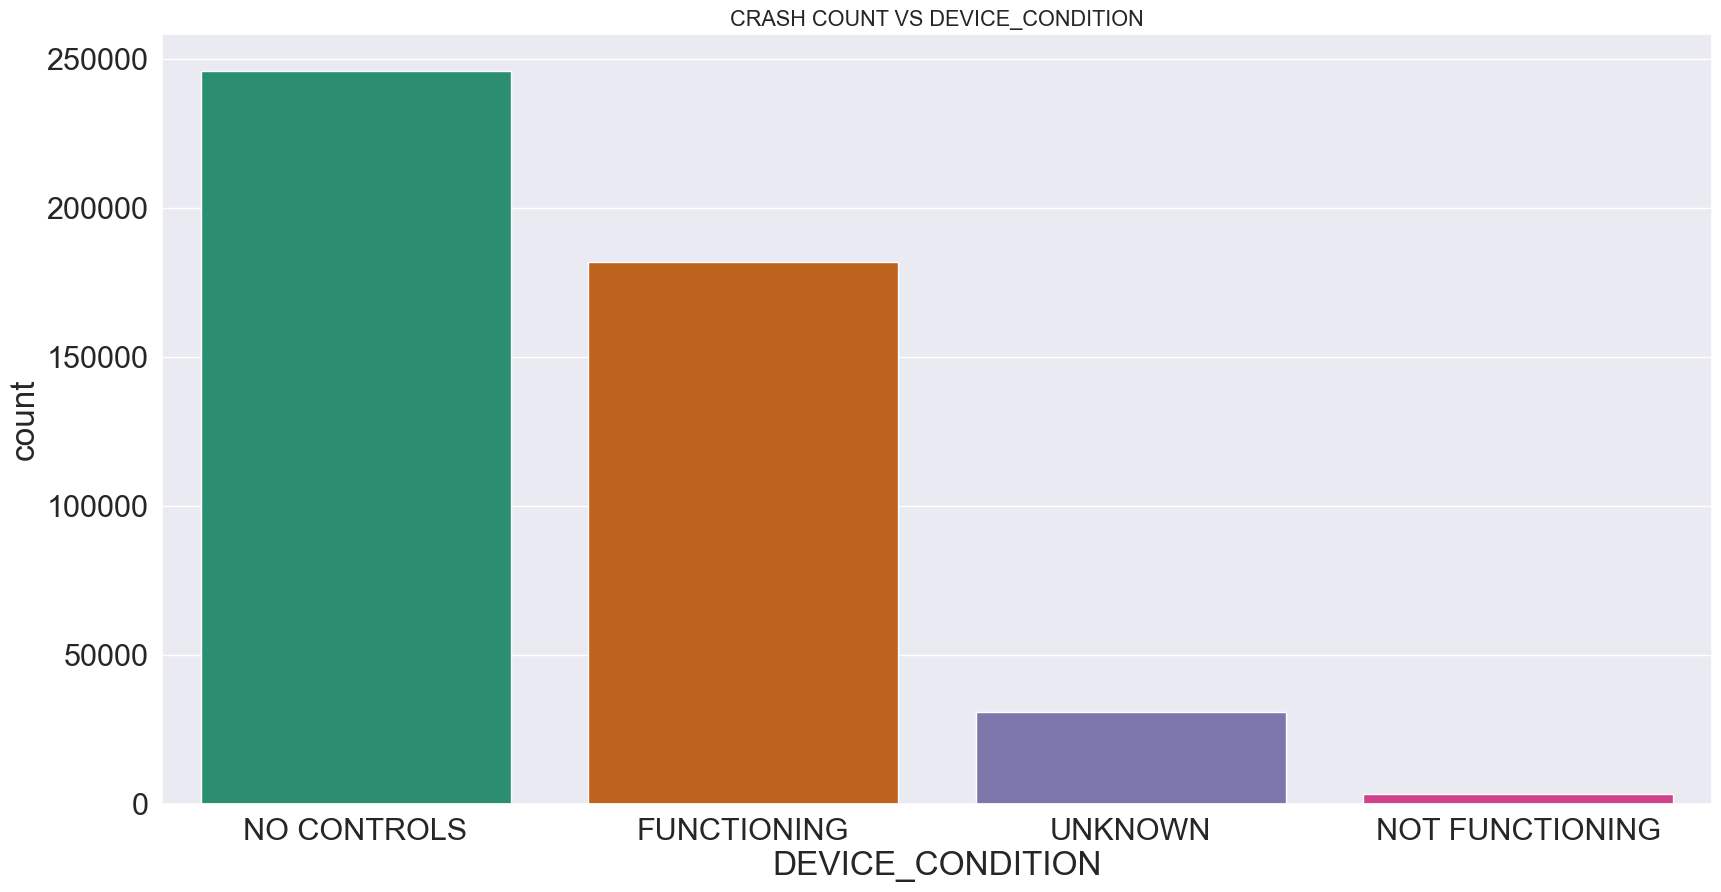

In [76]:
# lets plot a graph betwwen crashes count vs device condition
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="DEVICE_CONDITION", data = merged_df, palette ="Dark2").set(title = "CRASH COUNT VS DEVICE_CONDITION")
plt.show()

From the graph above, we can tell that crashes were high when the traffic control devices were not at site or in place. This could include no pavement markers, signs, signals, barricades and temporary signage that serve to inform and guide motor vehicles, pedestrians and cyclists regarding the rules of the road.  

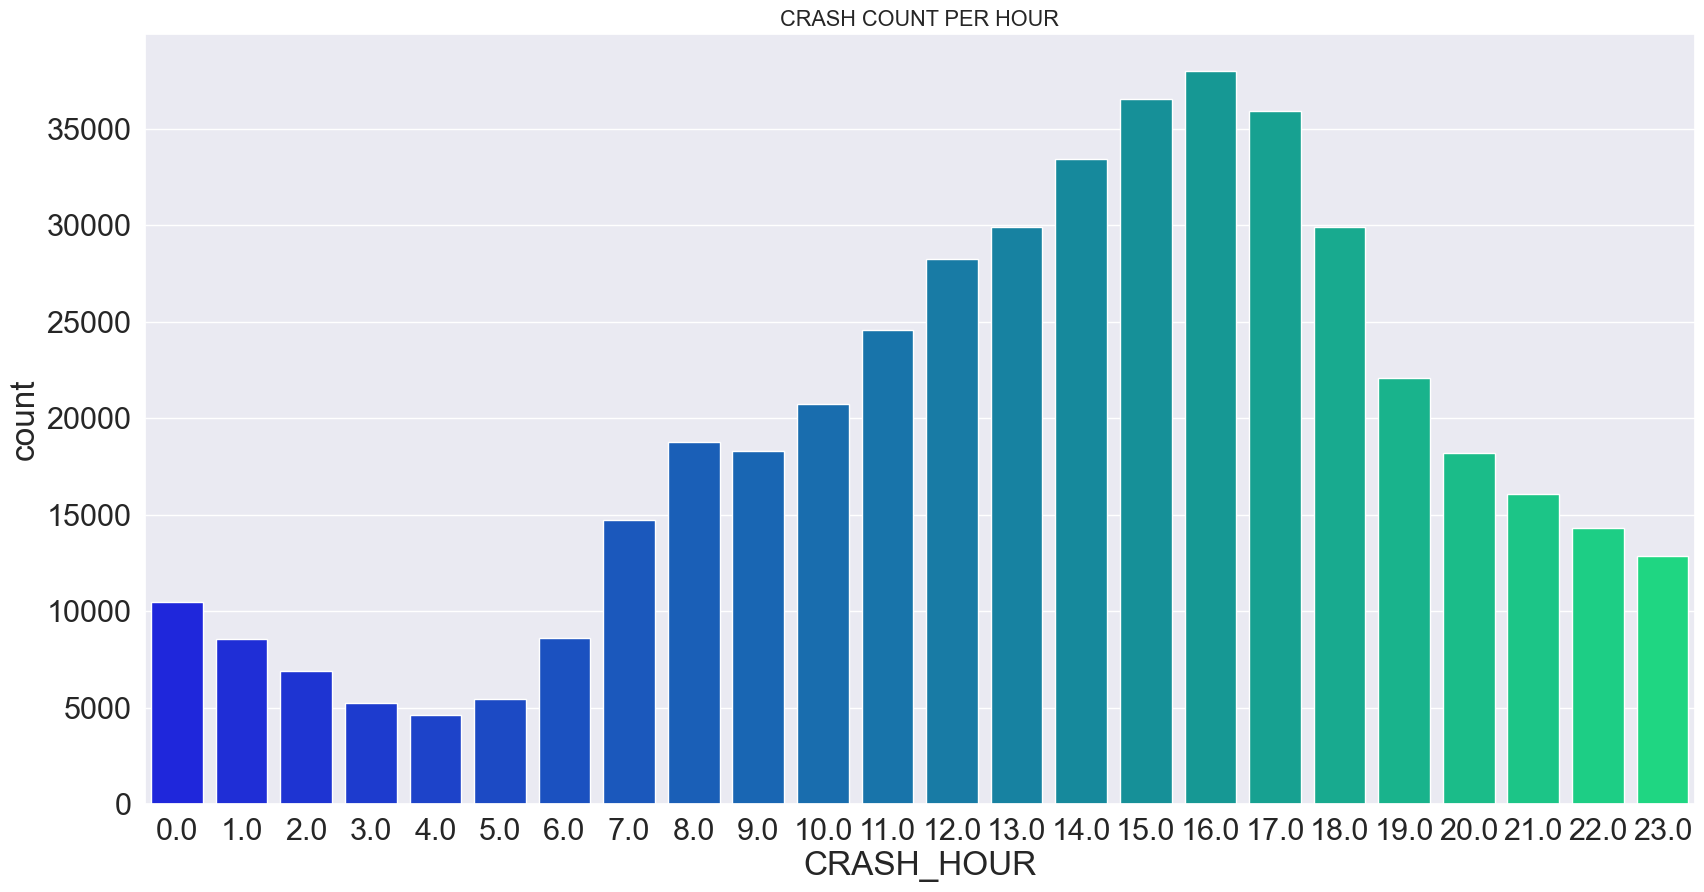

In [77]:
# crash count per hour
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="CRASH_HOUR", data = merged_df, palette ="winter").set(title = "CRASH COUNT PER HOUR" )
plt.show()

From the graph above, The afternoon rush hour tends to be more dangerous for drivers than the morning rush. The reason? There’s a variety of factors that contribute to these noon-time crashes, including:

* Distractions like phone calls and texts
* Aggressive driving and speeding as people hurry to get home
* Teenage drivers leaving school
* The prevalence of school buses and delivery vehicles
* Drowsy driving
* We tend to be stressed and preoccupied with the late afternoon after a long day at work, and this contributes to the higher accident rates during the afternoon rush hour.

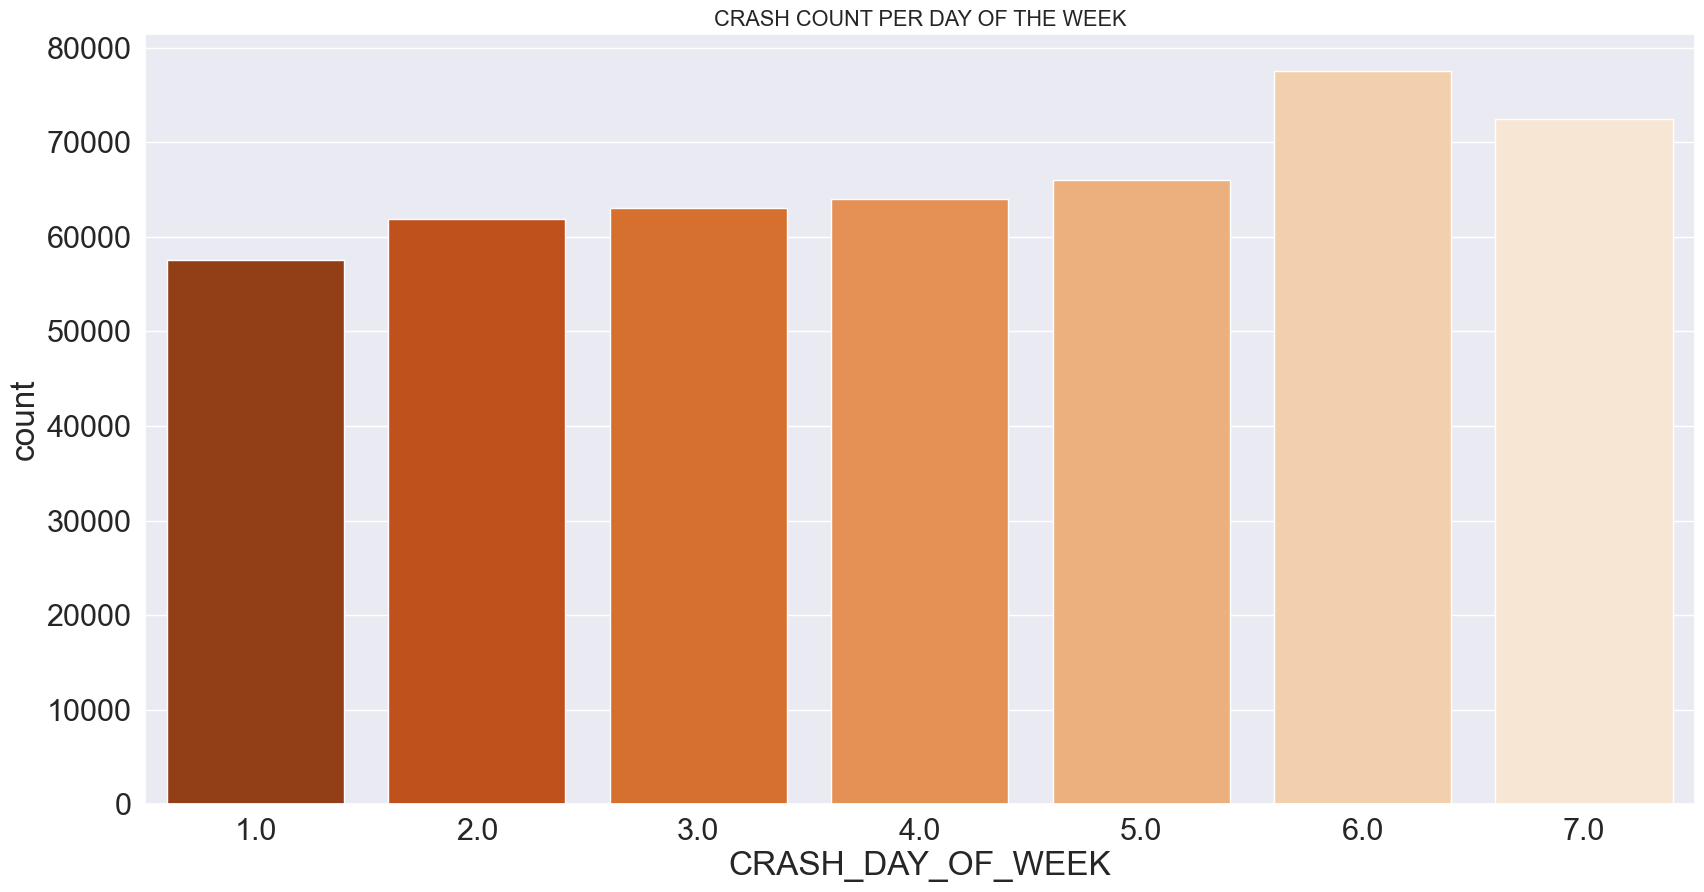

In [78]:
# crash count per day of week
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="CRASH_DAY_OF_WEEK", data = merged_df, palette ="Oranges_r").set(title = "CRASH COUNT PER DAY OF THE WEEK")
plt.show()

From the graph above, Overall, weekends have a larger volume of cars traveling. The number of cars is highest on Saturday, followed by Sunday, and then Friday. The more congestion there is, the higher your chances are of getting into an accident.

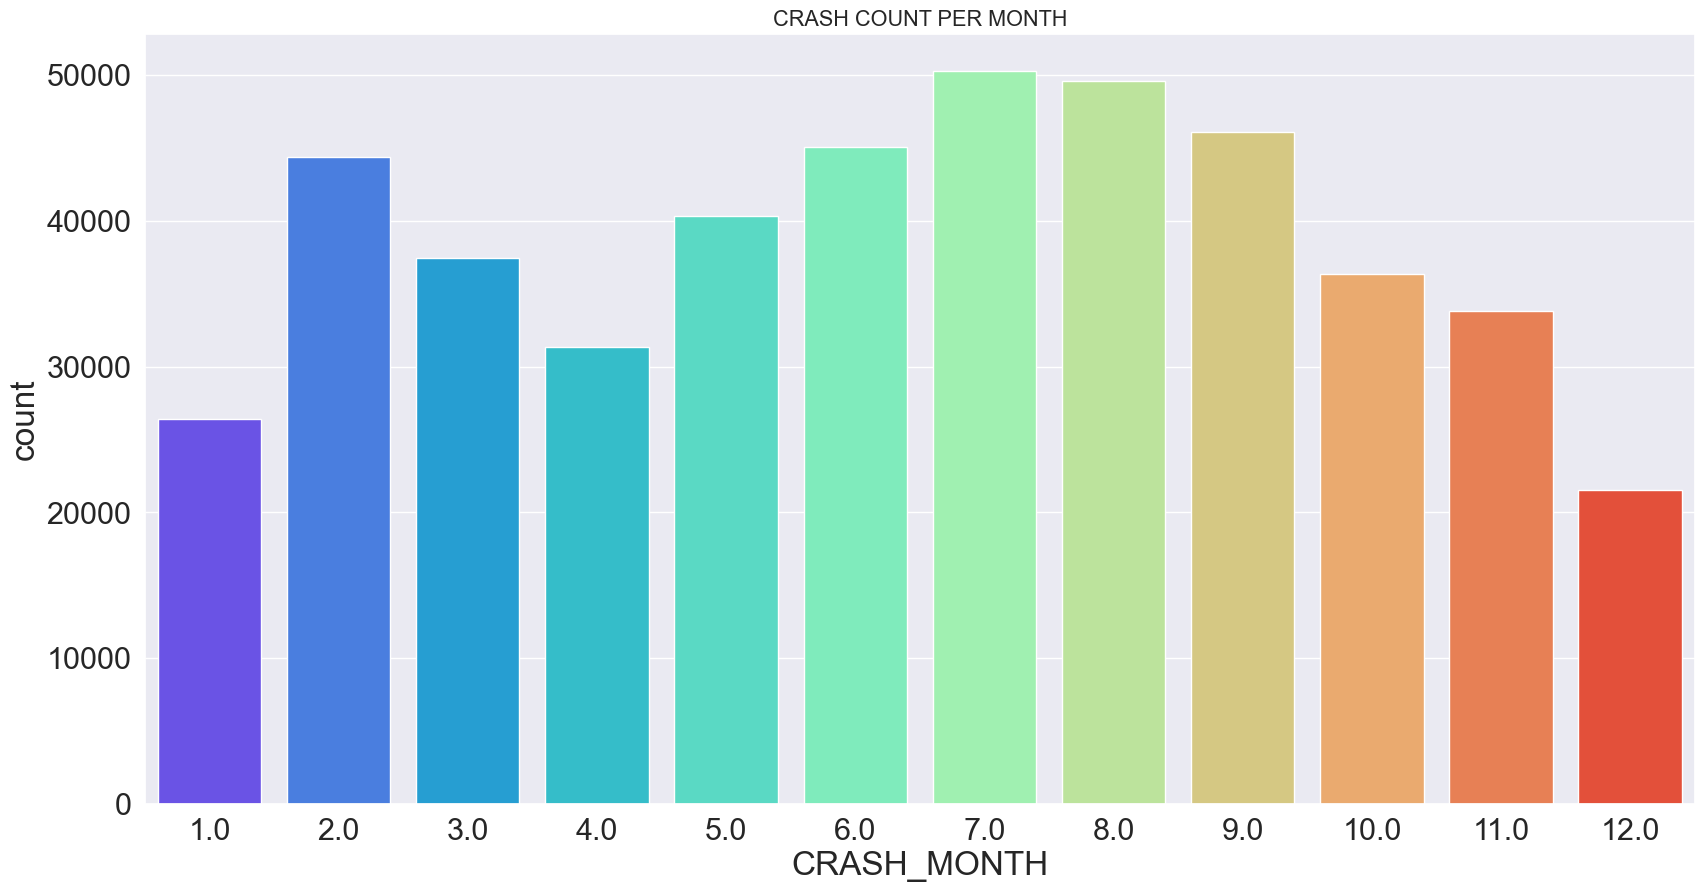

In [79]:
# crash count per month
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="CRASH_MONTH", data = merged_df, palette ="rainbow").set(title = "CRASH COUNT PER MONTH" )
plt.show()

From the above graph, most crashes happen within the second term of the year which is during the autumn season. Its where the weather can be highly unpredictable. Warm weather, rain, fog, frost, and sometimes snow can seemingly pop up in the forecast overnight. Heavy rainfall and frost can make the roads slippery, and fog can reduce visibility, increasing the risk of car accidents.

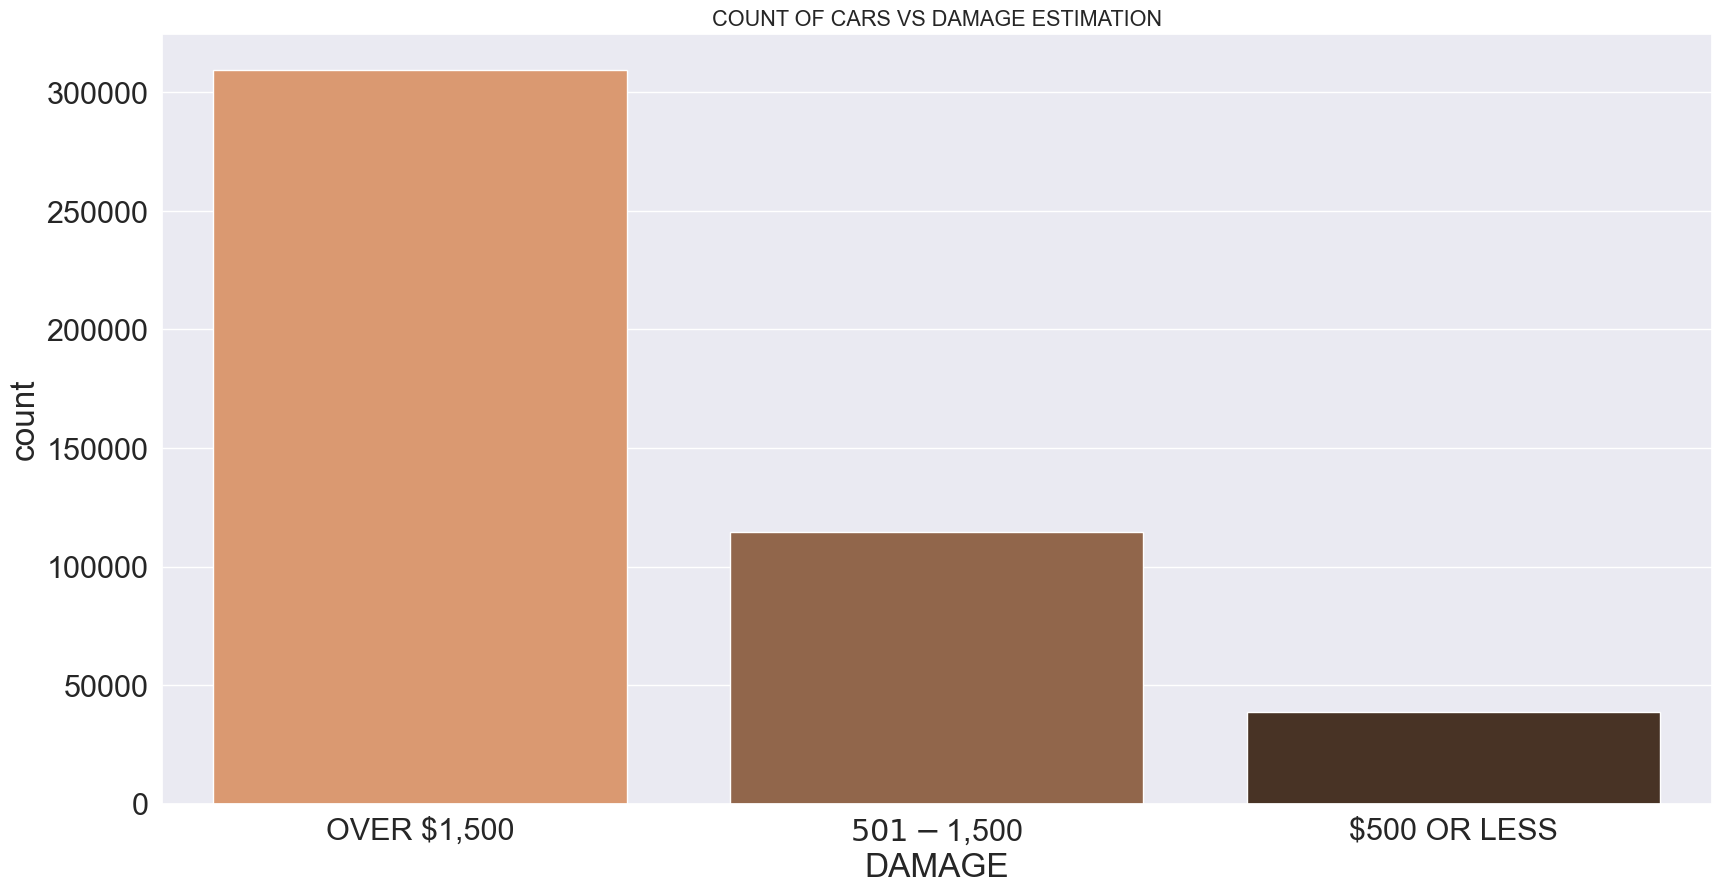

In [80]:
# crash count per damage estimation
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="DAMAGE", data = merged_df, palette ="copper_r").set(title = "COUNT OF CARS VS DAMAGE ESTIMATION" )
plt.show()

From the graph avove, most reported crashes have an estimated damage of over 1500 dollars. This could be due to the fault and liability for the crash and statements about the car accidents.

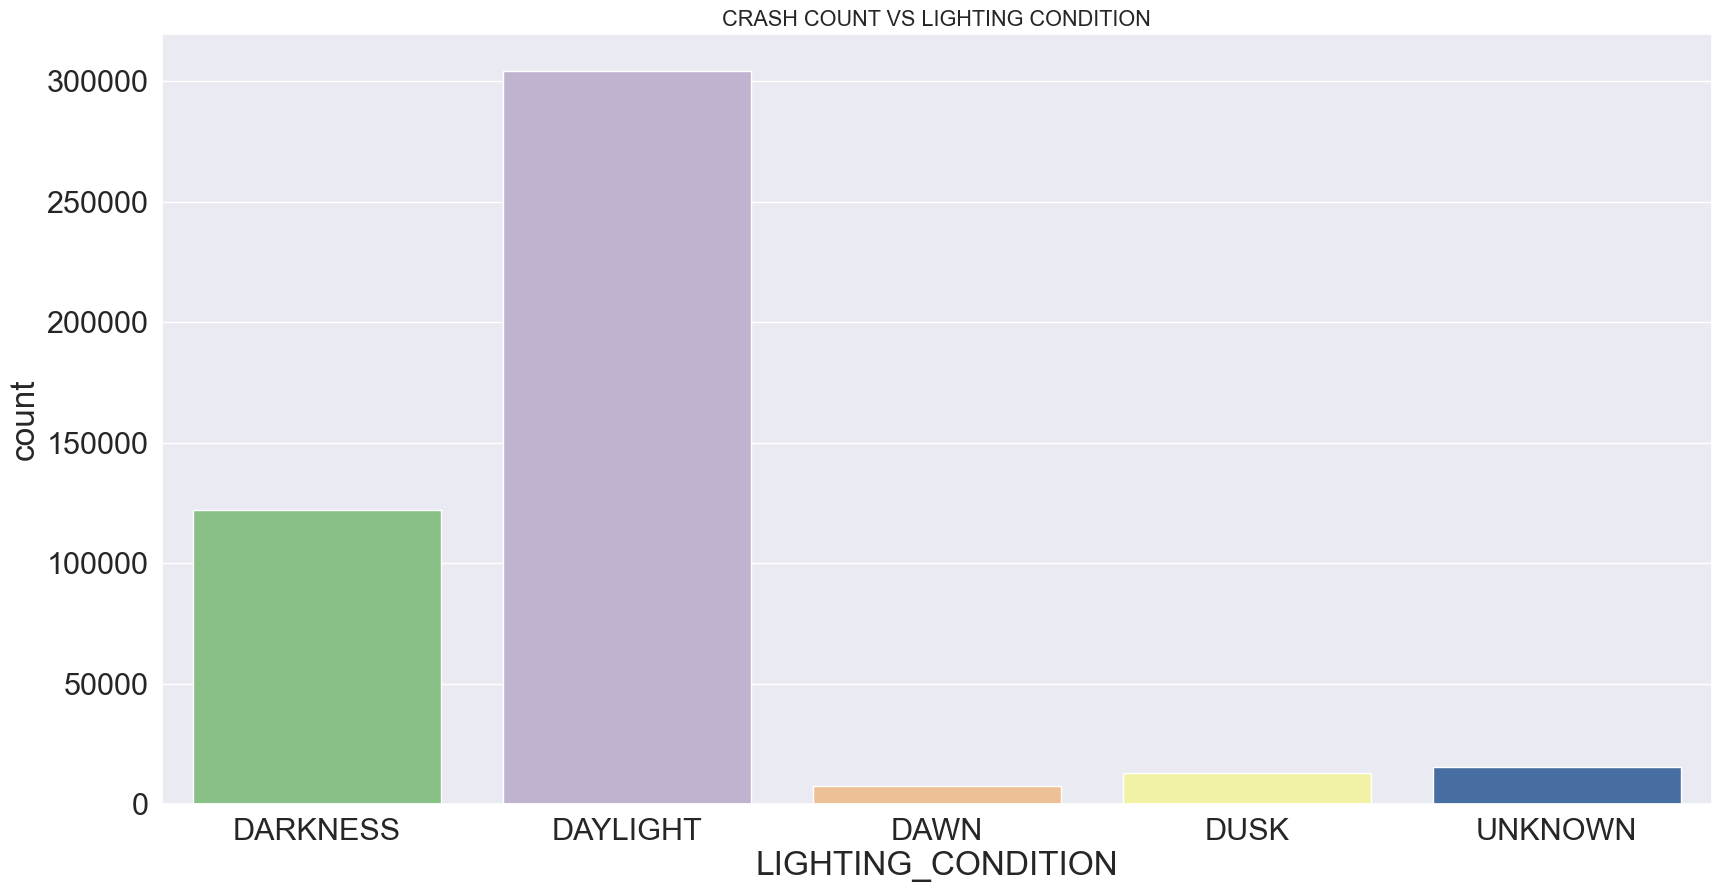

In [81]:
# crash count vs lighting condition
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="LIGHTING_CONDITION", data = merged_df, palette ="Accent").set(title = "CRASH COUNT VS LIGHTING CONDITION" )
plt.show()

From the graph above, car crashes are more during the day. This could be due to the afternoon rush hour as explained in the crash_hour graph. 

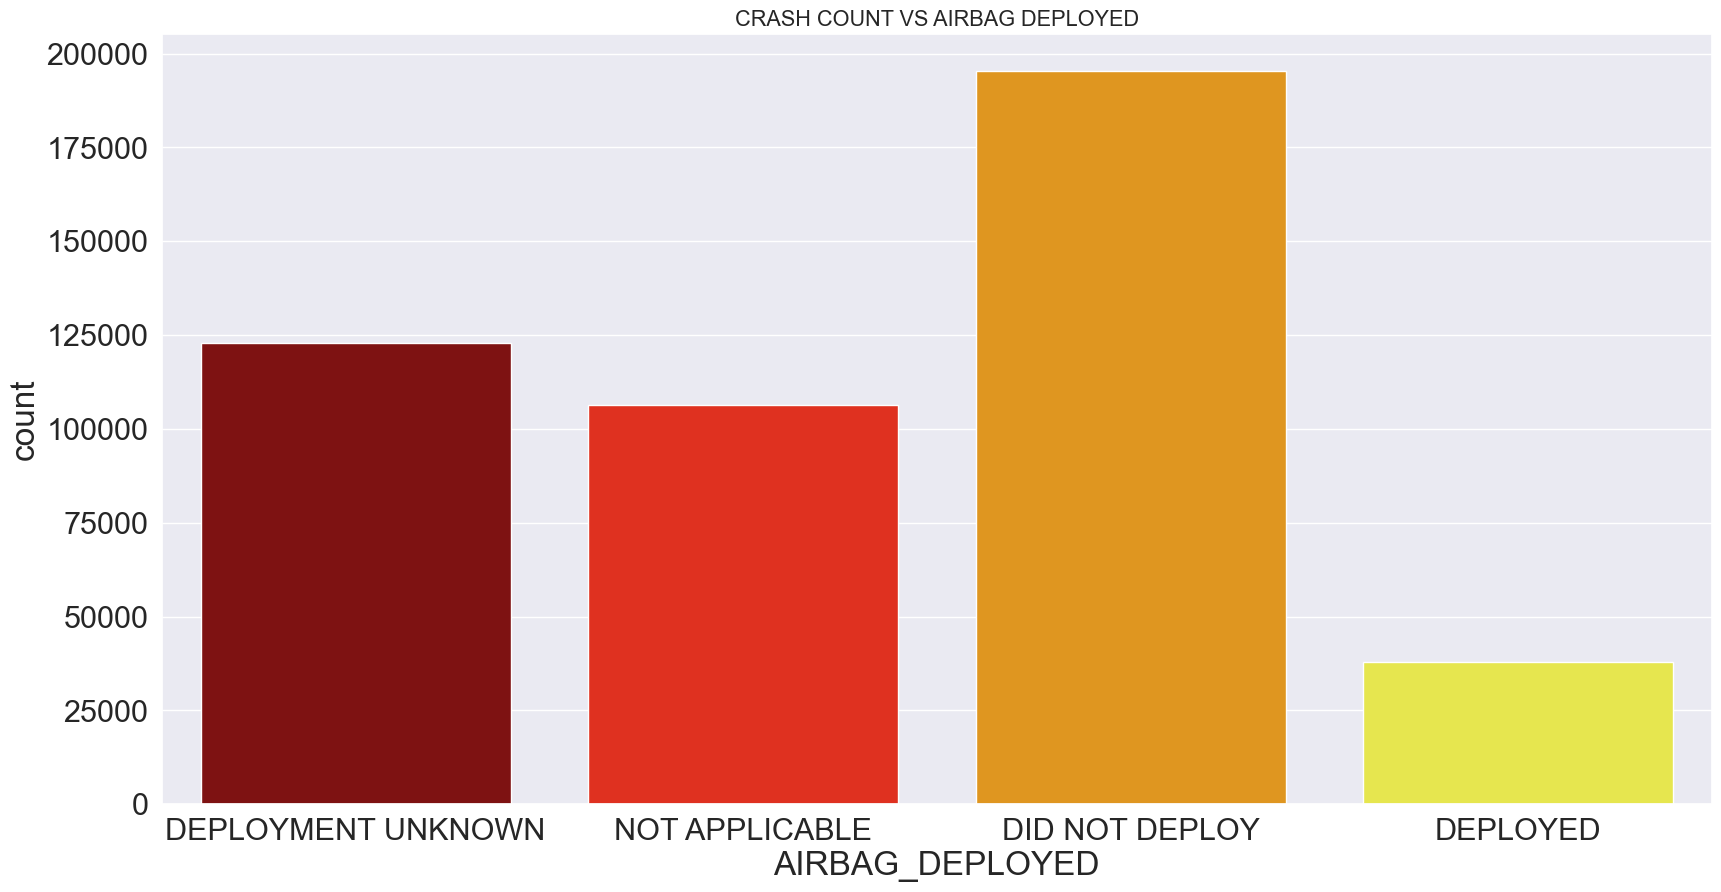

In [82]:
# crash count per airbag deployed
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="AIRBAG_DEPLOYED", data = merged_df, palette ="hot").set(title = "CRASH COUNT VS AIRBAG DEPLOYED" )
plt.show()

From the above graph, we notice that most cars that were involved in a crash had their airbag deployed.  Meaning the harder the impact, then the airbag deploys. This shows that the crash must have been very serious.

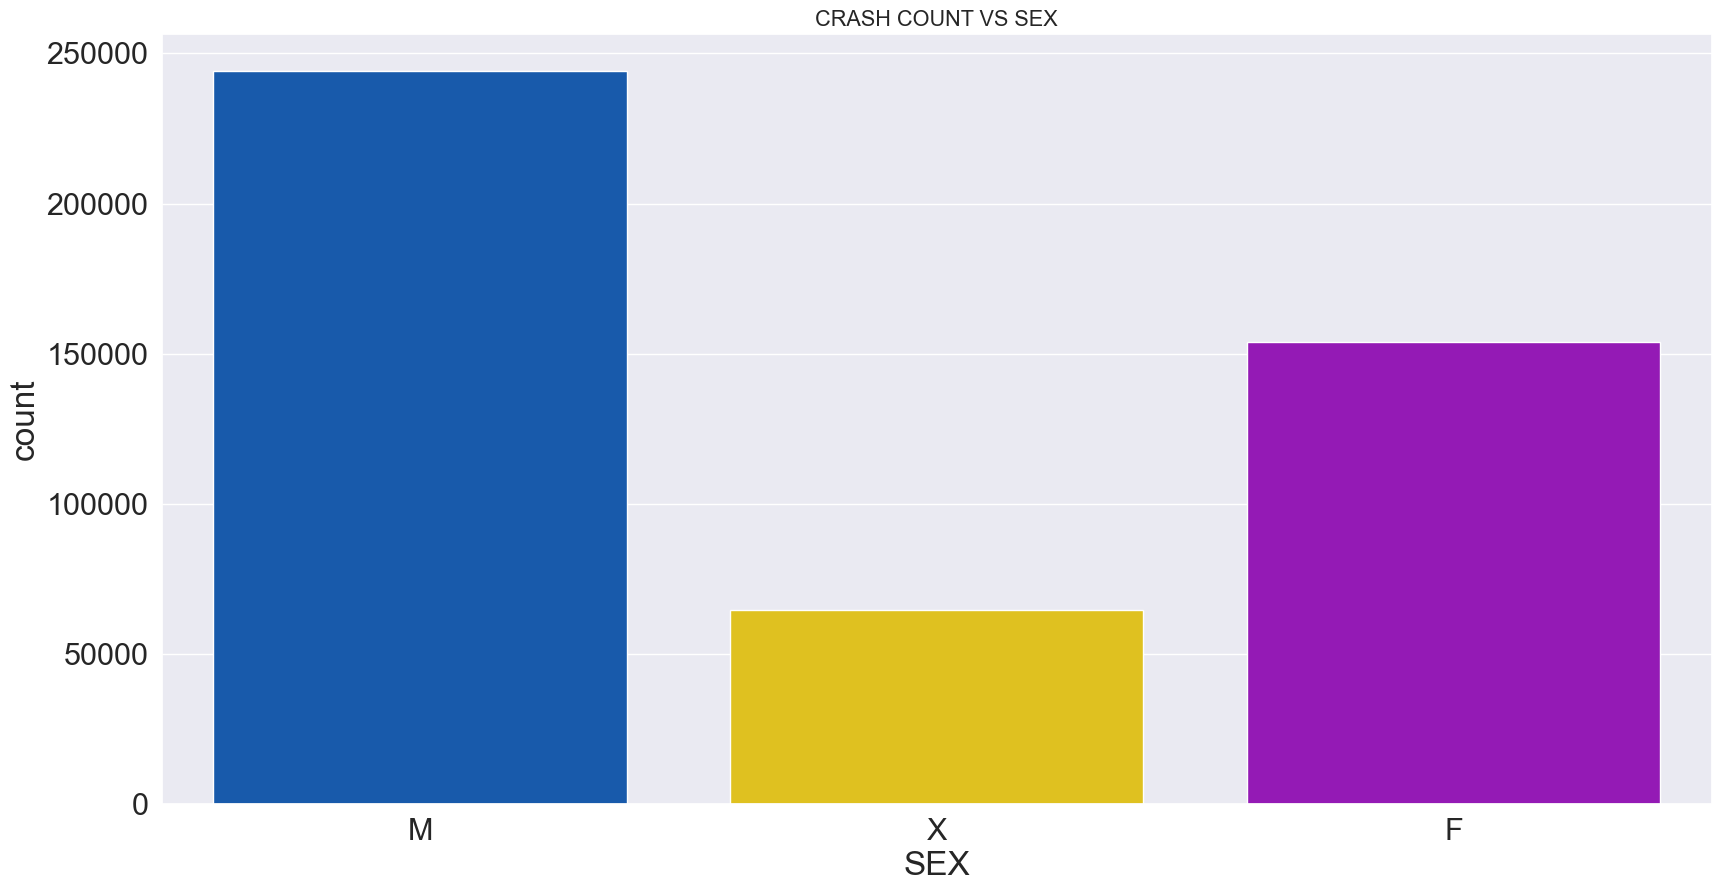

In [83]:
# crash count per sex
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="SEX", data = merged_df, palette ="prism").set(title = "CRASH COUNT VS SEX" )
plt.show()

From the graph above, Men apparently have the highest number of car crashes. Though this is not a shock as we know men love cars. Men engage in riskier behavior while driving: Men are less likely to wear seatbelts, and they are more likely to drive while intoxicated or drowsy. Such impairment can lead to accidents, and without seatbelts, men have a greater likelihood of dying.
Men Drive More Than Women: Men log more miles on the road than women do, which gives them more experience behind the wheel. But it also means they account for more accidents because they are more likely to be driving than a woman.
Men Speed More Than Women: The faster you drive your car, the higher the possibility you will get in an accident. This is especially true with younger men because they are almost twice as likely to die in a crash caused by high speeds than women.

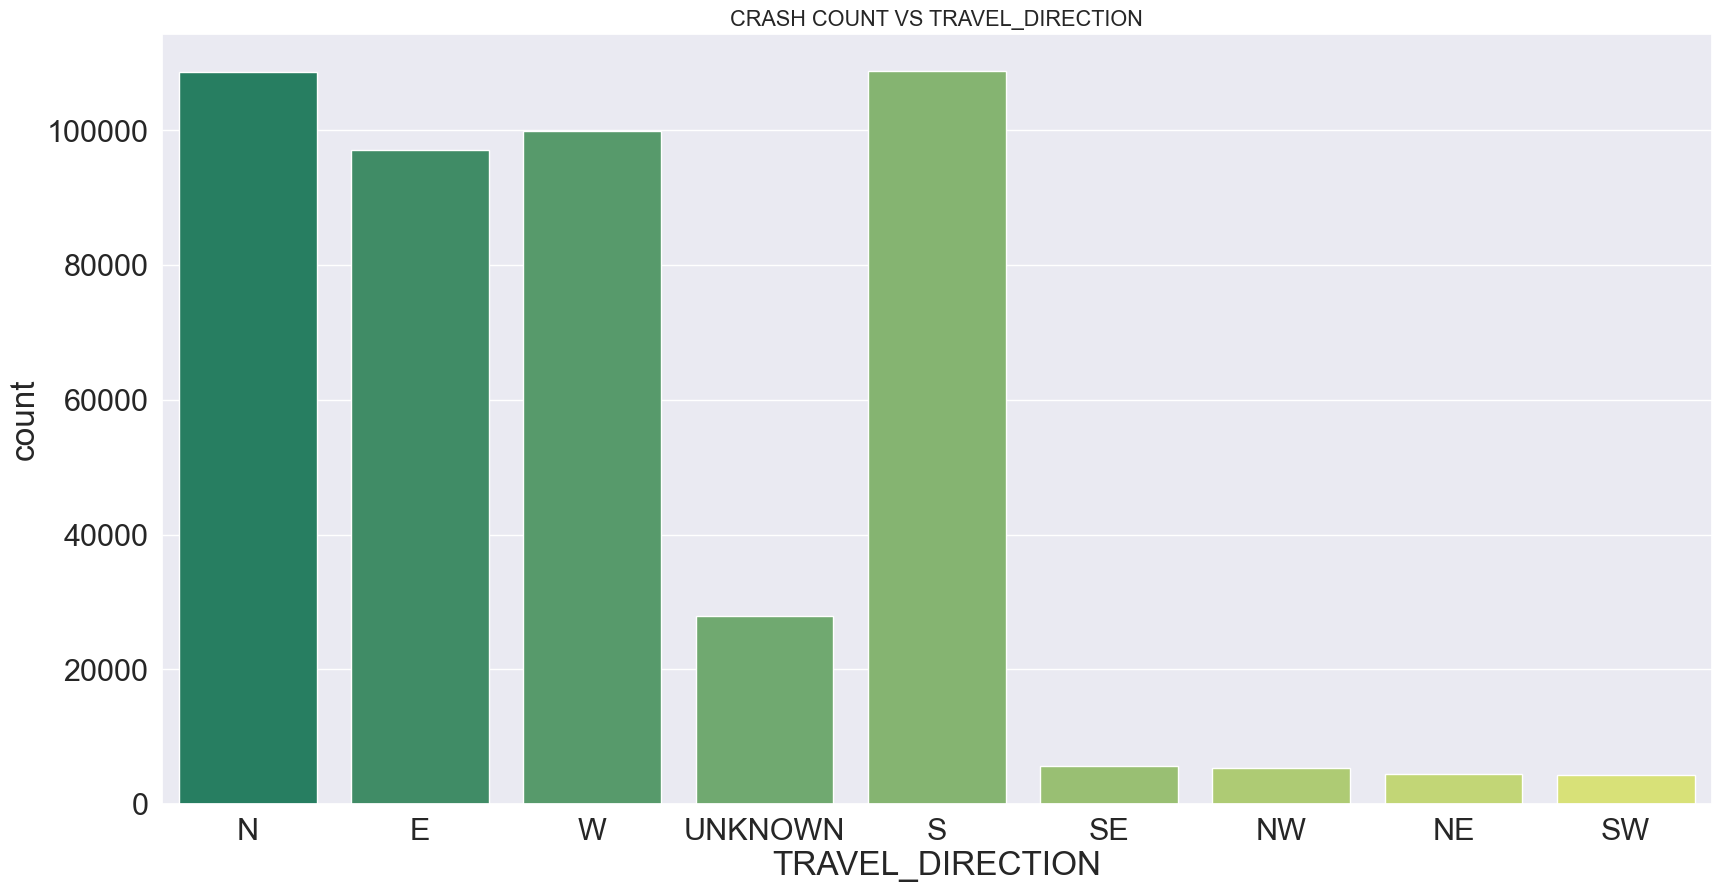

In [84]:
# crash count per travel direction
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
ax = sns.countplot(x="TRAVEL_DIRECTION", data = merged_df, palette ="summer").set(title = "CRASH COUNT VS TRAVEL_DIRECTION" )
plt.show()

From the graph above, we can tell that the areas within North, East, West and South have a high number of car crashes. With this information, one should be careful around those areas to avoid the risk of getting an accident. Reason been its happening could be because of maybe weather factors, busy streets...etc

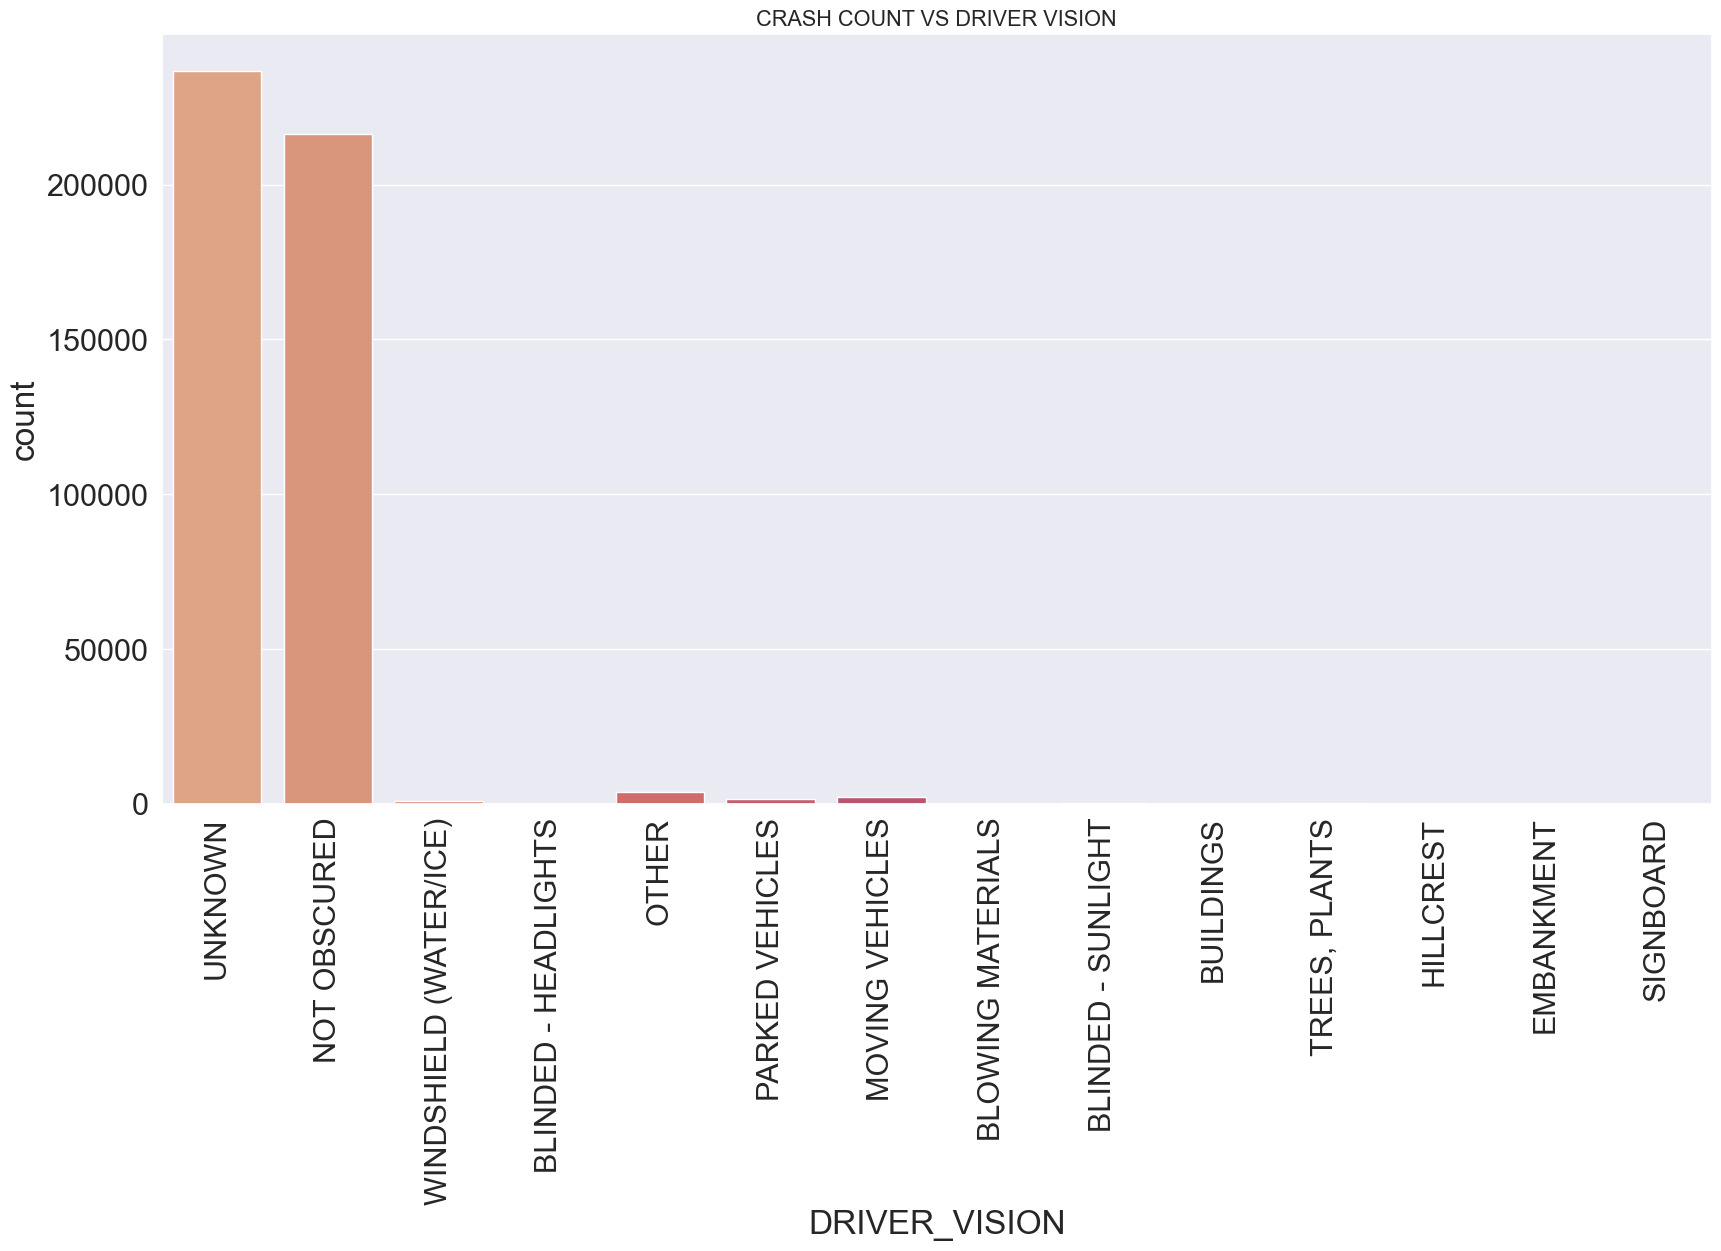

In [85]:
# crash count per driver vision
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
plt.xticks(rotation = 90)
ax = sns.countplot(x="DRIVER_VISION", data = merged_df, palette ="flare").set(title = "CRASH COUNT VS DRIVER VISION" )
plt.show()

From the graph above, significantly more crash incidences is where driver vision was NOT obscured.
Yet again, we see a high incidence of UNKNOWN values.

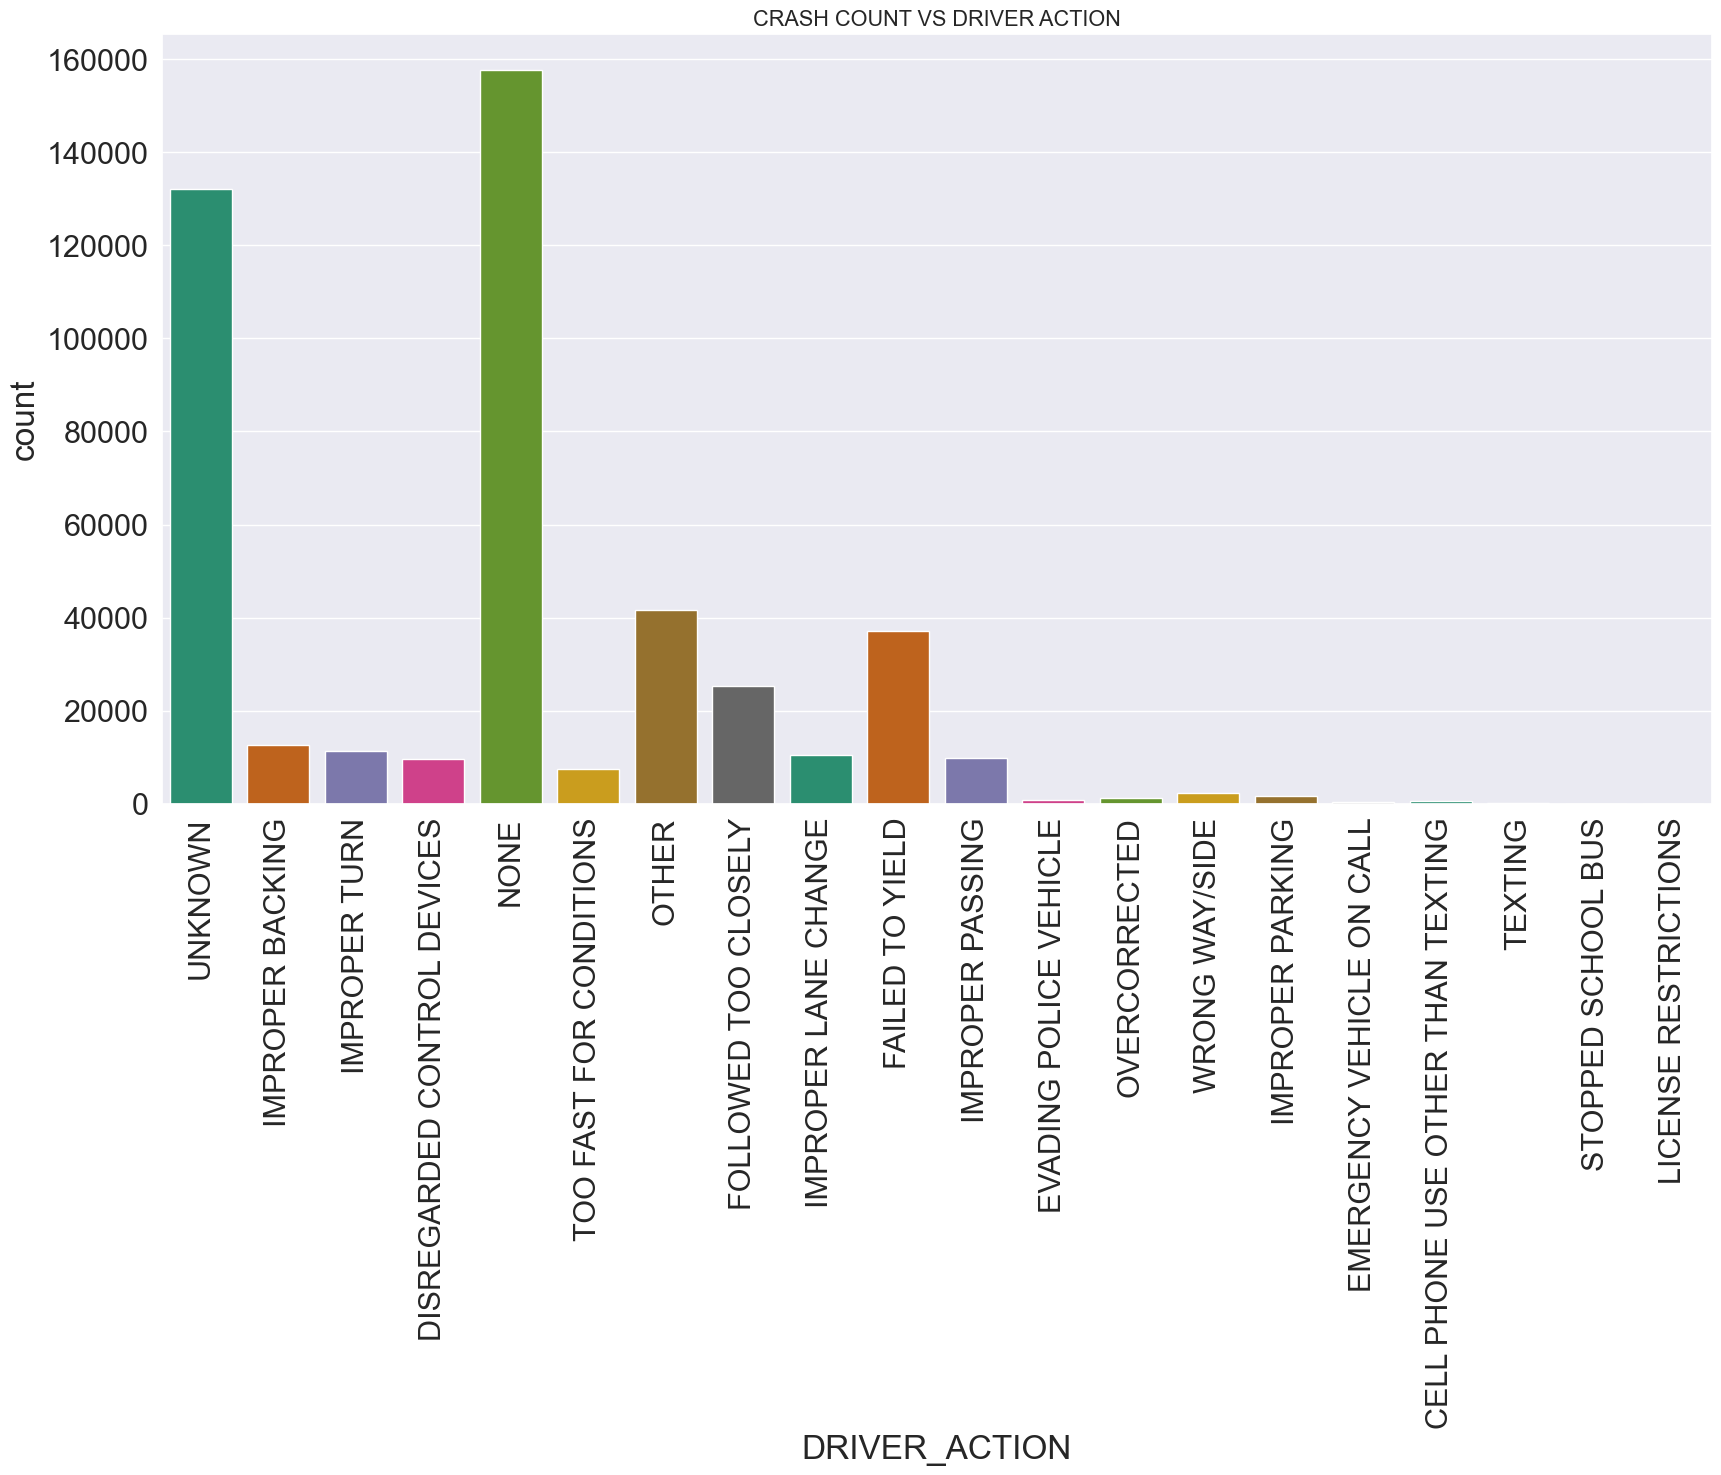

In [86]:
# crash count per driver action
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
plt.xticks(rotation = 90)
ax = sns.countplot(x="DRIVER_ACTION", data = merged_df, palette ="Dark2").set(title = "CRASH COUNT VS DRIVER ACTION" )
plt.show()

From the above graph, winning by a significant majority, the primary offense committed by drivers in our dataset is NONE and yet still UNKNOWN.

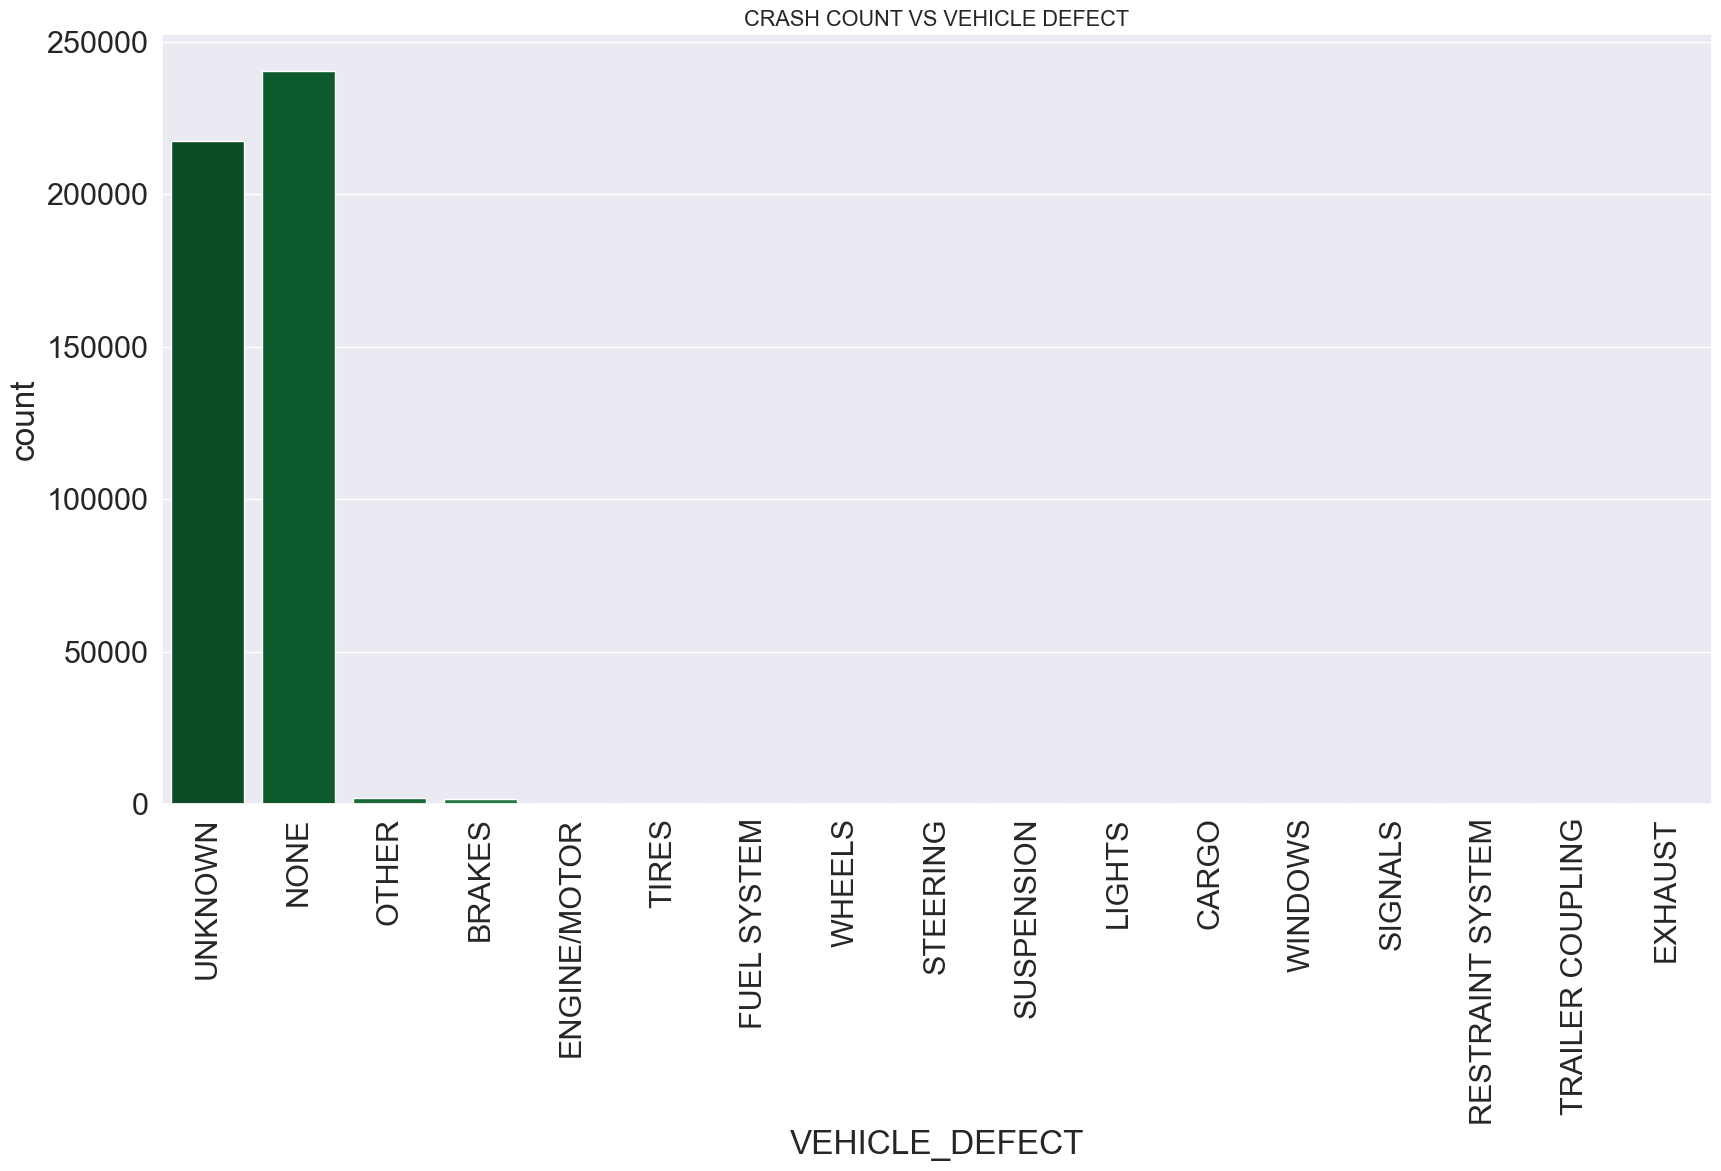

In [87]:
# crash count per vehicle defect
sns.set_style("whitegrid")
sns.set(font_scale=2)
ax = plt.subplots(figsize=(20,10))
sns.set(font_scale = 1.3)
x_axis = figsize = 50
y_axis = figsize = 20
plt.xticks(rotation = 90)
ax = sns.countplot(x="VEHICLE_DEFECT", data = merged_df, palette ="Greens_r").set(title = "CRASH COUNT VS VEHICLE DEFECT" )
plt.show()

From the above graph, If vehicles had a defect, most had issues with the NONE and UNKNOWN as well.

### Correlation

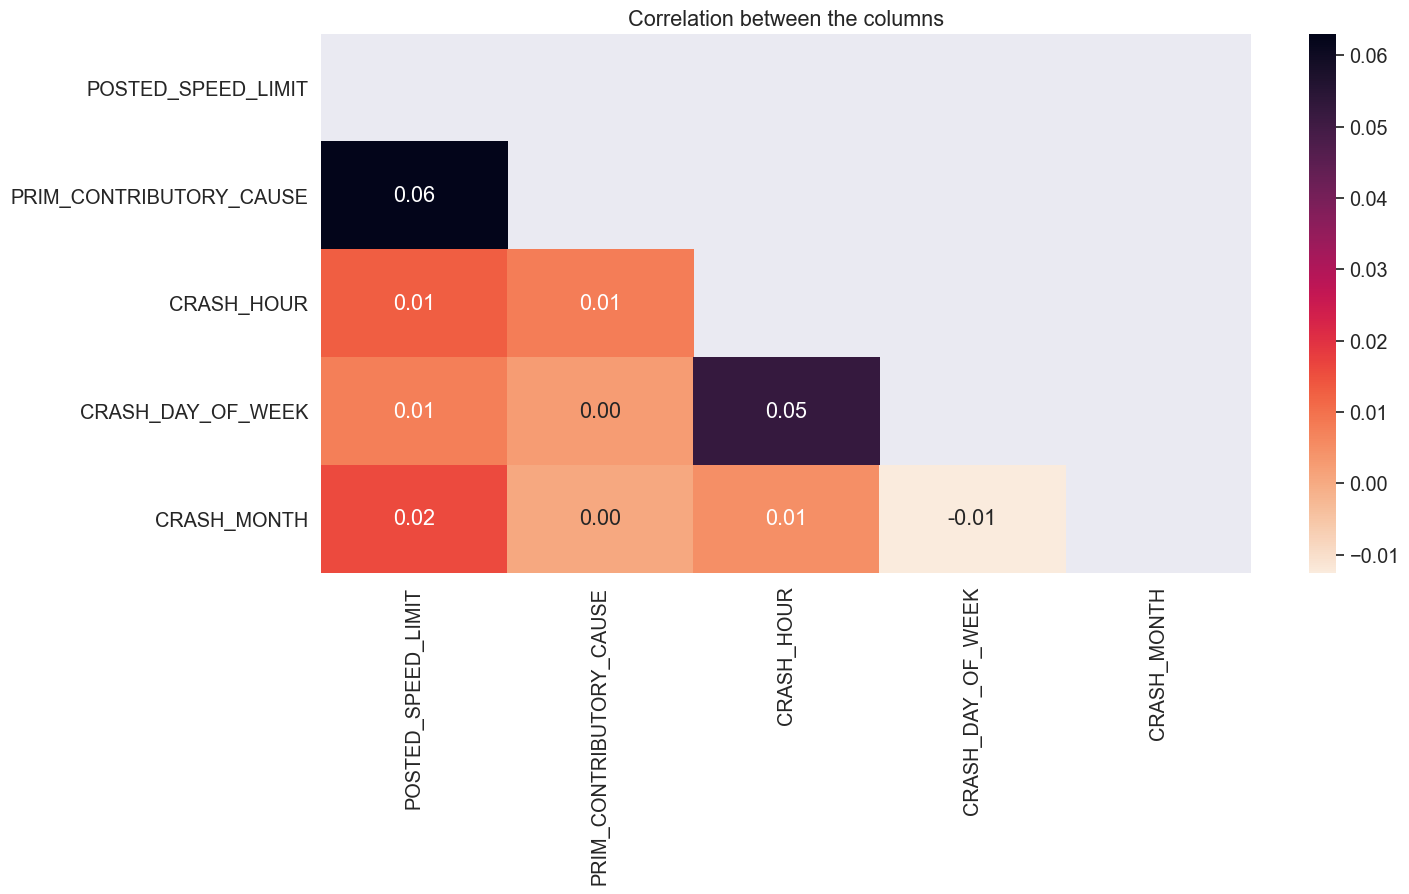

In [88]:
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(merged_df.corr(), dtype=bool))
sns.heatmap(merged_df.corr(),annot=True,cmap="rocket_r",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

From the above correlation, we can tell that the ones ranging in the highest are between PRIM_CONTRIBUTORY_CAUSE and POSTED_SPEED_LIMIT 0f 0.05, and CRASH_DAY_OF_WEEK and CRASH_HOUR  of 0.5.
The lowest is between CRASH_DAY_OF_WEEK and CRASH_MONTH -0.01


## 3) Feature Importance

### Preparing the data

In [89]:
X = merged_df.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1).copy()
y = merged_df.PRIM_CONTRIBUTORY_CAUSE

In [90]:
# Change the  predictors into dummies
X = pd.get_dummies(X, drop_first=True)

In [91]:
X.shape

(462500, 97)

### Train-Test Split

In [92]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Scaling data

In [93]:
#Instantiate Standard Scaler
scaler = StandardScaler()

# Fit and transform train and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Importance using Random Forest

In [94]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the model
random = RandomForestClassifier(n_estimators=100)
random.fit(X_train_scaled, y_train)  

RandomForestClassifier()

In [95]:
labels = list(X_train.columns)

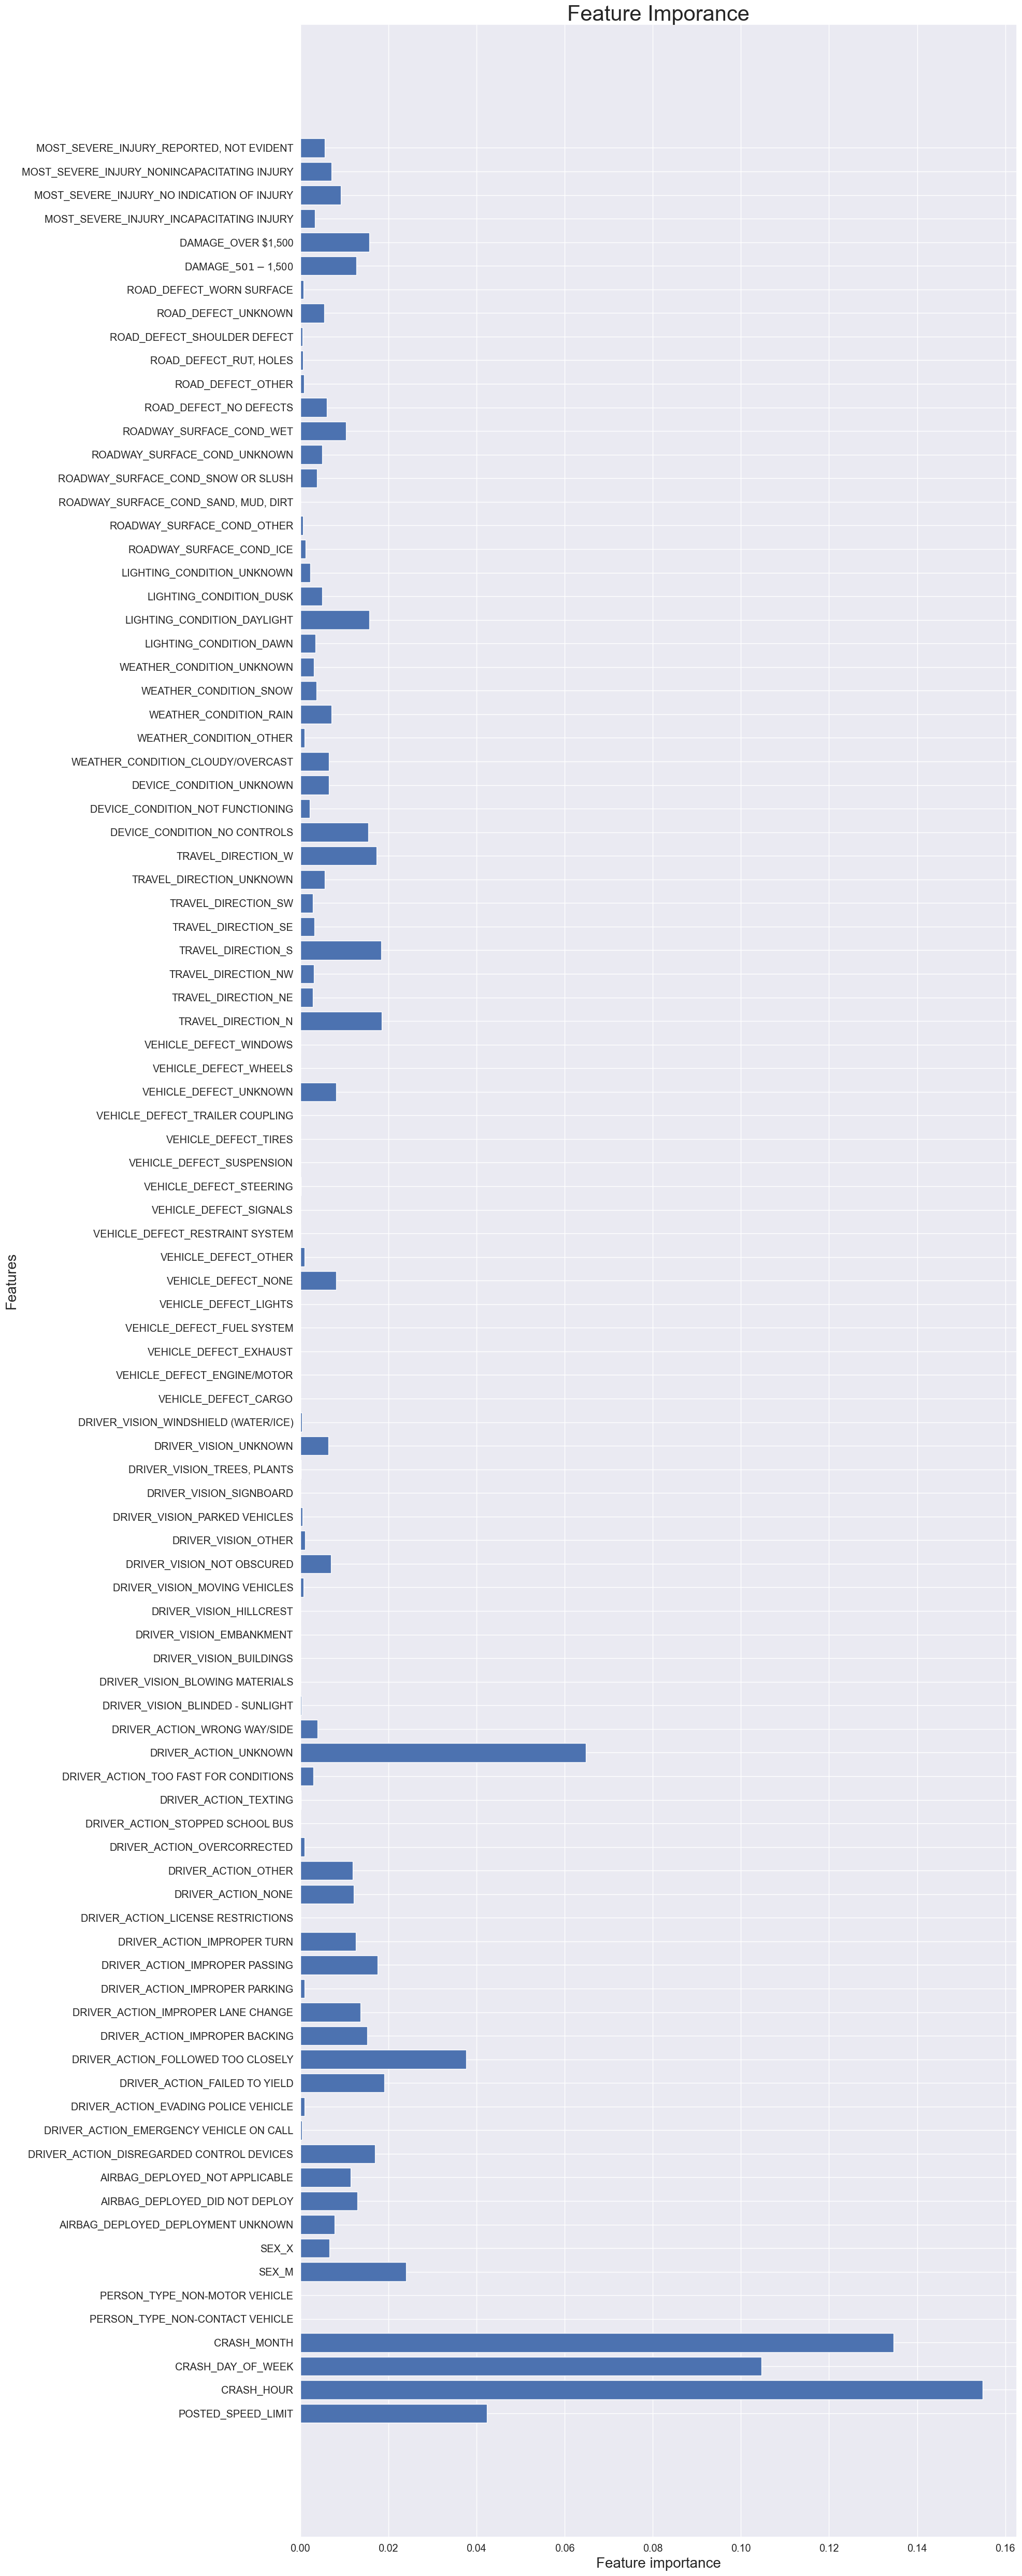

In [96]:
# Plotting the feature importances
n_features = X_train_scaled.shape[1]
plt.figure(figsize=(20,50))
plt.barh(range(n_features), random.feature_importances_, align='center') 
plt.yticks(np.arange(n_features),labels=labels)
plt.title('Feature Imporance', fontsize=30, pad=5)
plt.xlabel('Feature importance', fontsize=20, labelpad=5)
plt.ylabel('Features', fontsize=20)
plt.tight_layout()
plt.show()

From the above feature importance, we get to see how different habits cause car accidents and be able to explore more on our objectives.

Lets scale the feature importance to better see how the different factors affect/contribute towards car accidents.
* From 0.00 to 0.02 will rate it as AVERAGE
* From above 0.02 to 0.10 will rate it as ABOVE AVERAGE
* From above 0.10 to 0.16 will rte it as VERY HIGH

#### Objective 1: Analyze control failures to identify opportunities for improvement.

* TRAVEL DIRECTION - AVERAGE
* DEVICE CONTROLS - AVERAGE
* VEHICLE DEFECT - AVERAGE
* DRIVER VISION - AVERAGE 
* DRIVER ACTION - DRIVER FOLLOWED TOO CLOSELY and DRIVER UKNOWN is ABOVE AVERAGE while others are AVERAGE  
* POSTED SPEED LIMIT - ABOVE AVERAGE

#### Objective 2: Check for trends in the time of crash to relocate resources appropriately

* CRASH MONTH - VERY HIGH 
* CRASH DAY OF WEEK - VERY HIGH
* CRASH HOUR - VERY HIGH

####  Objective 3: Check for accidents caused by poor road quality and conditions and how to improve on it.

* ROAD DEFECT - AVERAGE
* ROADWAY SURFACE COND - AVERAGE

#### Objective 4: Check for accidents caused by natural forces.

* WEATHER CONDITION - AVERAGE
* LIGHTING CONDITION - AVERAGE

For the other factors remaining will rate them as below:-

* MOST SEVERE INJUTY - AVERAGE
* DAMAGES - AVERAGE
* AIRBAG DEPLOYED - AVERAGE
* SEX - AVERAGE
* PERSON TYPE - AVERAGE

### Encoding categorial columns

Models only work with numerical values. For this reason, it is necessary to convert the categorical values of the features into numerical ones, So the machine can learn from those data and gives the right model. This process of converting categorical data into numerical data is called Encoding.

In [97]:
# check on the category columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462500 entries, 0 to 679737
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERSON_TYPE              462500 non-null  object 
 1   SEX                      462500 non-null  object 
 2   AIRBAG_DEPLOYED          462500 non-null  object 
 3   DRIVER_ACTION            462500 non-null  object 
 4   DRIVER_VISION            462500 non-null  object 
 5   VEHICLE_DEFECT           462500 non-null  object 
 6   TRAVEL_DIRECTION         462500 non-null  object 
 7   POSTED_SPEED_LIMIT       462500 non-null  float64
 8   DEVICE_CONDITION         462500 non-null  object 
 9   WEATHER_CONDITION        462500 non-null  object 
 10  LIGHTING_CONDITION       462500 non-null  object 
 11  ROADWAY_SURFACE_COND     462500 non-null  object 
 12  ROAD_DEFECT              462500 non-null  object 
 13  DAMAGE                   462500 non-null  object 
 14  PRIM

In [98]:
# converting category to numerical
from sklearn.preprocessing import LabelEncoder
category_columns = ['PERSON_TYPE', 'SEX', 'AIRBAG_DEPLOYED', 'DRIVER_ACTION', 'DRIVER_VISION', 'VEHICLE_DEFECT',
                       'TRAVEL_DIRECTION', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
                       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
                       'MOST_SEVERE_INJURY']
# create label encoder
labelencoder = LabelEncoder()
for cat in category_columns:
    merged_df[cat] = labelencoder.fit_transform(merged_df[cat])
merged_df

,PERSON_TYPE,SEX,AIRBAG_DEPLOYED,DRIVER_ACTION,DRIVER_VISION,VEHICLE_DEFECT,TRAVEL_DIRECTION,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,0,1,1,18,12,14,1,30.0,1,3,0,6,1,2,0,2,3.0,7.0,9.0
1,0,1,1,18,12,6,1,30.0,1,3,0,6,1,2,0,2,3.0,7.0,9.0
2,0,1,1,18,12,14,1,30.0,1,3,0,6,1,2,0,2,3.0,7.0,9.0
7,0,2,1,6,12,6,0,30.0,1,0,0,0,1,2,0,2,5.0,1.0,11.0
8,0,2,1,6,12,6,8,30.0,1,0,0,0,1,2,0,2,5.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679720,0,1,1,6,12,6,0,30.0,0,0,0,0,1,2,1,2,22.0,2.0,10.0
679721,0,1,2,12,7,6,8,30.0,0,0,0,0,1,2,1,2,22.0,2.0,10.0
679722,0,1,2,12,7,6,0,30.0,0,0,0,0,1,2,1,2,22.0,2.0,10.0
679727,0,0,0,18,12,14,8,35.0,3,0,0,0,5,2,0,2,23.0,2.0,10.0


### Train, Split and Transform data

In [99]:
merged_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

0    306998
1    155502
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [100]:
# llocating the target and the predictors
target = 'PRIM_CONTRIBUTORY_CAUSE'
y = merged_df[target]
x = merged_df.drop(columns = 'PRIM_CONTRIBUTORY_CAUSE', axis=1)

In [101]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

In [102]:
# instantiate the standardscaler and fit the X_train and X_test to be scaled
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4) Modelling the data

### Logistics Regression

In [103]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split df into X and y
X = merged_df.drop("PRIM_CONTRIBUTORY_CAUSE", axis=1)
y = merged_df["PRIM_CONTRIBUTORY_CAUSE"]

# Perform train-test split with random_state=42 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Build and Evaluate a Baseline Model

In [104]:
# Import LogisticRegression and cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.5833135603648449

The log loss is around 0.583 with our baseline model.

We cant state whether it is good or bad because log loss is not explainable.

In [105]:
# calculate the accuracy
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
logistics_accuracy = accuracy_score(y_pred, y_test)
logistics_accuracy

0.6613448648648649

In [106]:
# calculating the recall
from sklearn.metrics import recall_score
logistics_recall = recall_score(y_test, y_pred)
logistics_recall

0.2526898247771288

In [107]:
# calculating the precision
from sklearn.metrics import recall_score
logistics_precision = precision_score(y_test, y_pred)
logistics_precision

0.49695198750566777

Lets check the model performance for this model using the ROC AUC to measure how good our algorithm is.

In [108]:
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.7097859344407482


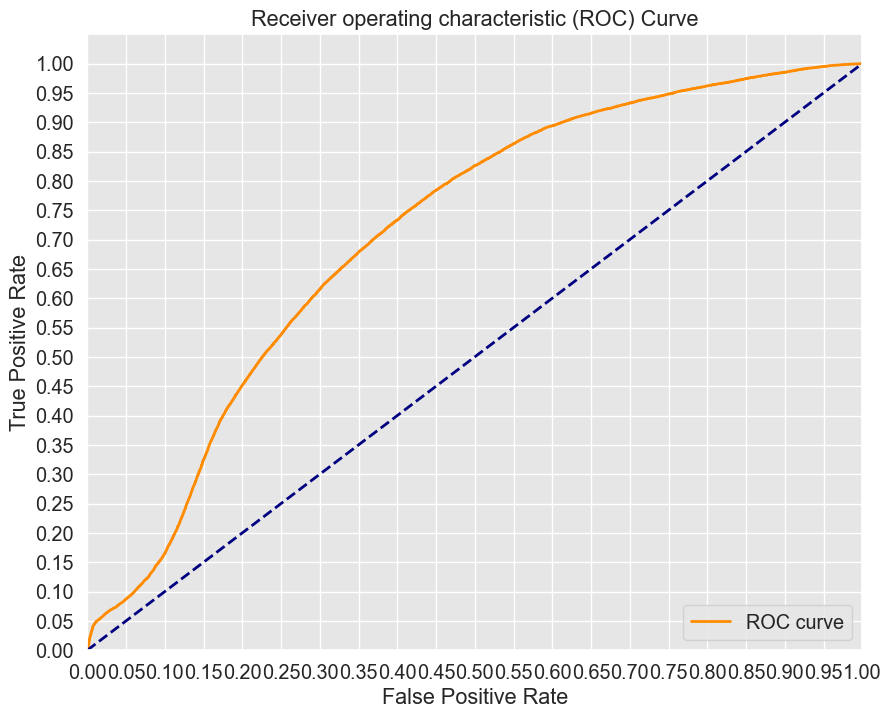

In [109]:
from sklearn.metrics import roc_curve, auc
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* The baseline_log_loss is **0.5833135603648449**.
* The accuracy is **0.6613448648648649**.
* The recall is **0.2526898247771288**.
* The precision is **0.49695198750566777**.
* The AUC is **0.7097859344407482**

In this model our accuracy was **66%** and AUC is **70%**



### K Nearest Neighbour

Build a Baseline kNN Model

In [110]:
# import KNeighborsClassifier and cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
knn_baseline_model = KNeighborsClassifier()
knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_baseline_log_loss

1.7893844751451298

Logistic regression model had a log loss of **0.5833135603648449**

Is this model worse? lets compare it in terms of metrics to check whether this model is worse or better.

Lets build Iterative Models to Find the Best kNN Model

In [111]:
# Will start by increasing the number of neighbours to see if it improves.

knn_scnd_model = KNeighborsClassifier(n_neighbors=50)

knn_scnd_log_loss = -cross_val_score(knn_scnd_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_scnd_log_loss

0.5606329805171452

Almost Perfecto!!. 
Lets change the distance metric from euclidean to manhattan without changing the kn number.

In [112]:
knn_thrd_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

knn_thrd_log_loss = -cross_val_score(knn_thrd_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_thrd_log_loss

0.5374582107083046

Not so much of a difference as compared to the above one **0.5606329805171452**.

Lets try increasing the kn number to see if it performs better.

In [113]:
knn_frth_model = KNeighborsClassifier(n_neighbors=100, metric="manhattan")

knn_frth_log_loss = -cross_val_score(knn_frth_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_frth_log_loss

0.5362942653888856

Its better than knn_thrd_model and when kn number was at default.

Since we cant create more models, for now we'll just say that knn_frth_model is our best one.


Lets check the model performance for this model using the ROC AUC and accuracy score to measure how good our algorithm is.

In [114]:
# calculate the accuracy
knn_baseline_model.fit(X_train, y_train)
y_pred = knn_baseline_model.predict(X_test)
knn_accuracy = accuracy_score(y_pred, y_test)
knn_accuracy

0.7402032432432433

In [115]:
# calculating the recall
knn_recall = recall_score(y_test, y_pred)
knn_recall

0.5526180961164053

In [116]:
# calculating the precision 
knn_precision = precision_score(y_test, y_pred)
knn_precision

0.6317392450288458

In [117]:
knn_frth_model.fit(X_train, y_train)
y_pred = knn_frth_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

AUC: 0.6521851756929807


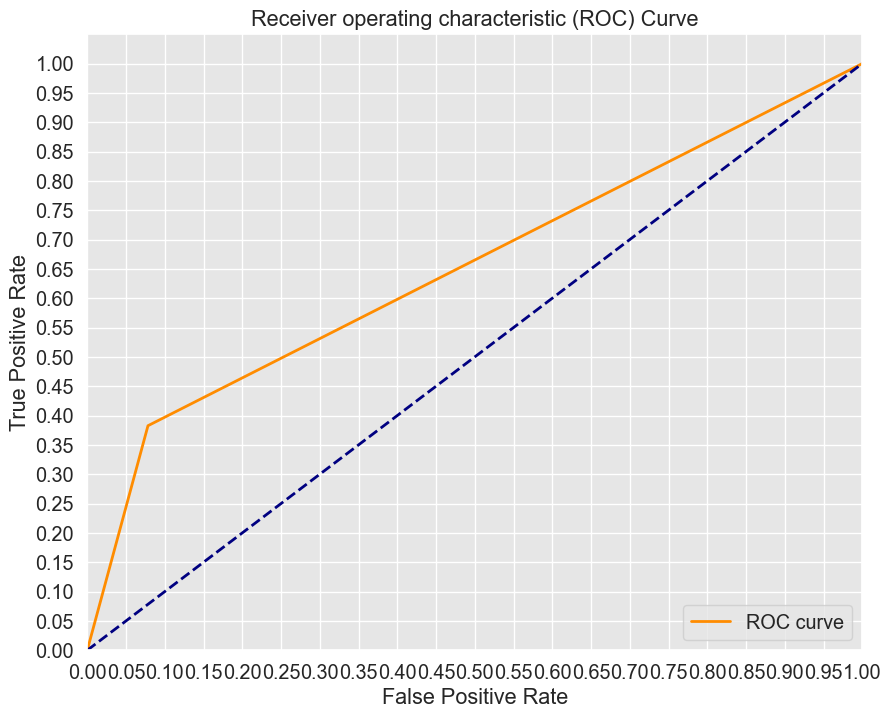

In [118]:
from sklearn.metrics import roc_curve, auc
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* The baseline_log_loss is **1.7893844751451298**.
* The accuracy is **0.7402032432432433**.
* The recall is **0.5526180961164053**.
* The precision is **0.6317392450288458**.
* The AUC is **0.6521851756929807**

In this model our accuracy was **74%** and AUC is **65%**


### Decision Tree Model

In [119]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
dt_baseline_model = DecisionTreeClassifier(random_state=42)

dt_baseline_log_loss = -cross_val_score(dt_baseline_model, X_train, y_train, scoring="neg_log_loss").mean()
dt_baseline_log_loss

6.625605348564119

This is much worse than either the logistic regression or the knn models. 
We could say the model is overfitting because we have not remmoved all the unwanted.

Lets build Iterative Models to Find the Best Decision Tree Model

We can start with increasing min_samples by an order of magnitude which is similar to increasing kn numbers.

In [120]:
# Your code here (add more cells as needed)
dt_scnd_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)

dt_scnd_log_loss = -cross_val_score(dt_scnd_model, X_train, y_train, scoring="neg_log_loss").mean()
dt_scnd_log_loss

1.3459265618423566

Increasing the minimum samples per leaf helped reduce overfitting. 
Lets try by increasing them again and see what happens. 


In [121]:
# Your code here (add more cells as needed)
dt_thrd_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100)

dt_thrd_log_loss = -cross_val_score(dt_thrd_model, X_train, y_train, scoring="neg_log_loss").mean()
dt_thrd_log_loss

0.514761510096206

let's try using the same min_samples_leaf as before and also specifying the class weight

In [122]:
# Your code here (add more cells as needed)
dt_frth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, class_weight="balanced")

dt_frth_log_loss = -cross_val_score(dt_frth_model, X_train, y_train, scoring="neg_log_loss").mean()
dt_frth_log_loss

0.5540711542019945

Lets not use the class_weight hyperparameter for now.

Lets try by limiting the no of features that can be used in a given split while keeping min_samples_leaf the same.

In [123]:
dt_fth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, max_features="sqrt")

dt_fth_log_loss = -cross_val_score(dt_fth_model, X_train, y_train, scoring="neg_log_loss").mean()
dt_fth_log_loss

0.5374514088173061

Still not better than dt_thrd_model

Let's try one more value for min_samples_leaf

In [124]:
dt_sxth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=75)

dt_sxth_log_loss = -cross_val_score(dt_sxth_model, X_train, y_train, scoring="neg_log_loss").mean()
dt_sxth_log_loss

0.5282926165181012

Lets check the model performance for this model using the ROC AUC and accuracy score to measure how good our algorithm is.

In [125]:
# calculate the accuracy
dt_baseline_model.fit(X_train, y_train)
y_pred = dt_baseline_model.predict(X_test)
dt_accuracy = accuracy_score(y_pred, y_test)
dt_accuracy

0.8410118918918918

In [126]:
# calculating the recall
dt_recall = recall_score(y_test, y_pred)
dt_recall

0.7712880418075623

In [127]:
# calculating the precision 
dt_precision = precision_score(y_test, y_pred)
dt_precision

0.7610140788110102

In [128]:
dt_thrd_model.fit(X_train, y_train)
y_pred = dt_thrd_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

AUC: 0.6973719404360946


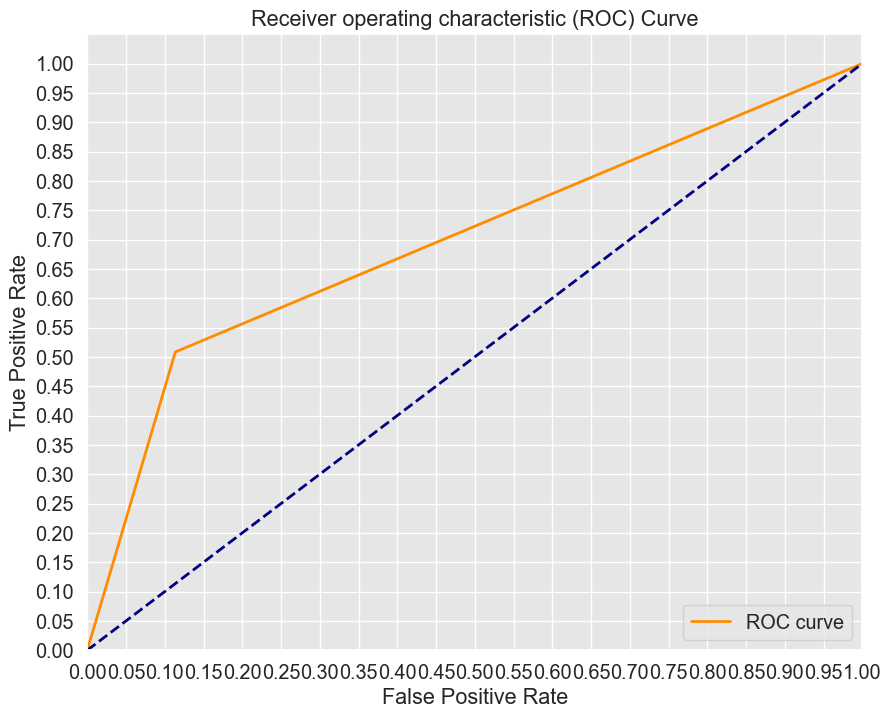

In [129]:
from sklearn.metrics import roc_curve, auc
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* The baseline_log_loss is **6.625605348564119**.
* The accuracy is **0.8410118918918918**.
* The recall is **0.7712880418075623**.
* The precision is **0.7610140788110102**.
* The AUC is **0.6973719404360946**

In this model our accuracy was **84%%** and AUC is **70%**

## Evaluation

In [130]:
final_model = DecisionTreeClassifier(random_state = 42)

# Fit the model on the full training data
# (scaled or unscaled depending on the model)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [131]:
# Now, evaluate the log loss, accuracy, precision, and recall.

from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

pred = final_model.predict(X_test)
prob = final_model.predict_proba(X_test)

print("log loss: ", log_loss(y_test, prob))
print("accuracy: ", accuracy_score(y_test, pred))
print("precision:", precision_score(y_test, pred))
print("recall:   ", recall_score(y_test, pred))

log loss:  5.550885238270511
accuracy:  0.8410118918918918
precision: 0.7610140788110102
recall:    0.7712880418075623


As for the final model, DecisionTreeClassifier was the best fit model. This is because:-
* Accuracy score is 84% which is the highest as compared to KNN and Logistic Regression.
* Precision score is 76% which is the highest as compared to KNN and Logistic Regression.
* Recall score is 77% which is the highest as compared to KNN and Logistic Regression.

Can conclude that the higher the percentage, the better the model is performing as one can verify from the accuracy, precision and recall score. 

## Conclusion

1. Road traffic injury is a threat to the health and development.
2. No institutional frameworks exist within the region.
3. Legislation and enforcement of key road safety interventions need to be strengthened in many regions.
4. Adherence to vehicle and road design safety standards is low in the region.
5. Some important data are non-existent or incomplete.

## Recommendations

1. Establish and strengthen lead agencies and manage performance through targetsetting. 
2. Make safe, healthy, environment-friendly transport choices; design transport around walking, cycling and public transport. 
3. Focus on implementing the five most effective interventions to reduce chances of injury during a crash.
   * Control speed. Speed limits on urban and rural roads and motorways should be set by defining each road type in the          regions. 
   * Implement seatbelt laws. Seatbelt laws should apply to all vehicle occupants; and these laws should be better              enforced.
   * Enforce use of standard motorcycle helmets. Motorcycle helmet law should include pillion riders and a standard needs        to be defined for these helmets in the regions. 
   * Ascertain the role of alcohol in road crashes and control it, if found to be a problem. 
4. Allow only safe vehicles on the roads. Vehicle manufacturing and import standards should be evaluated in the region to ensure that only vehicles that allow international safety standards.
5. Ensure safe road design through safety audits at all stages of road construction and maintenance. 
6. Improve trauma care. A pre-hospital care system of ambulances connected through a universal access number is an important but just one component of a comprehensive trauma system. 
7. Define data needs; harmonize definitions and data collection methodology in order to advocate the need for road safety targets.
8. Enhance institutional capacity for data gathering, analysis and dissemination.
9. Implemention of collaborative relationships between health, police and traffic authorities will need to be established for setting up surveillance systems. 